<a href="https://www.kaggle.com/code/sulaniishara/eda-lgbm-predicting-backpack-prices?scriptVersionId=226858501" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

<div style="border-radius: 15px; border: 2px solid #8B9467; padding: 20px; background: linear-gradient(135deg, #A1C9F2, #8B9467); text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);">
    <h1 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); font-weight: bold; margin-bottom: 10px; font-size: 36px; font-family: 'Roboto', sans-serif;">
        🎒📊 EDA & 💡 LGBM: Predicting Backpack Prices 💰
    </h1>
</div>


### **Dataset Overview 📊**  

The dataset consists of various attributes related to backpacks, including their price, brand, material, size, compartments, laptop compatibility, waterproofing, style, color, and weight capacity 🎒. The primary objective is to analyze these features to understand pricing patterns and develop a predictive model for price estimation 📈.  

Each feature provides valuable insights into product characteristics:  
- **Brand & Material:** Define the manufacturer and build quality 🛠️.  
- **Size & Compartments:** Indicate storage capacity and organizational efficiency 🗂️.  
- **Laptop Compartment & Waterproofing:** Highlight functional aspects that impact usability 💻🌂.  
- **Style & Color:** Represent aesthetic appeal and customer preferences 🎨.  
- **Weight Capacity:** Determines durability and intended use 🏋️‍♀️.  
- **Price:** The target variable to be predicted based on other attributes 💸.  

This dataset enables a comprehensive study of backpack pricing trends and factors influencing customer purchasing decisions 🛍️.  

### **Project Objectives 🎯**  

1️⃣ **Identify Key Price Drivers:**  
   - Analyze which attributes significantly influence backpack prices.  
   - Evaluate the impact of factors such as brand, material, and weight capacity 📈.  

2️⃣ **Understand Feature Correlations:**  
   - Examine relationships between features (e.g., Does waterproofing increase price?) 🤔.  
   - Explore interactions between different attributes affecting pricing.   

4️⃣ **Develop a Predictive Model Using LightGBM:**  
   - Train a **LightGBM Regressor** to predict backpack prices using numerical features.  
   - Fine-tune hyperparameters and evaluate model performance using RMSE (Root Mean Squared Error).  
   - Generate **feature importance plots** to understand the significance of each attribute.  
   - Visualize model performance with **Actual vs. Predicted plots** and **Residual Analysis**.  
   - Predict prices for unseen test data and save the results for further evaluation 💻.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Import Libraries</span>

<div style="border-radius: 15px; border: 2px solid #8B9467; padding: 10px; background: linear-gradient(135deg, #A1C9F2, #4CB391); text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);">
    <h1 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); font-weight: bold; margin-bottom: 5px; font-size: 28px; font-family: 'Roboto', sans-serif;">
        Import Libraries
    </h1>
</div>


In [1]:
# Load the cuDF pandas extension
#%load_ext cudf.pandas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import plotly.express as px  
import plotly.io as pio  
pio.renderers.default = 'iframe'  
from IPython.display import display

import cudf
from cuml.preprocessing import TargetEncoder
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from lightgbm import early_stopping, log_evaluation, plot_importance 

import warnings
warnings.filterwarnings("ignore")

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Loading and Initial Exploration</span>

<div style="border-radius: 15px; border: 2px solid #8B9467; padding: 10px; background: linear-gradient(135deg, #A1C9F2, #4CB391); text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);">
    <h1 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); font-weight: bold; margin-bottom: 5px; font-size: 28px; font-family: 'Roboto', sans-serif;">
        Data Loading and Initial Exploration
    </h1>
</div>


In [2]:
# Load the datasets
train_data = pd.read_csv('/kaggle/input/playground-series-s5e2/train.csv',index_col='id')
test_data = pd.read_csv('/kaggle/input/playground-series-s5e2/test.csv',index_col='id')
sample_data = pd.read_csv('/kaggle/input/playground-series-s5e2/sample_submission.csv')
train_ex_data = pd.read_csv('/kaggle/input/playground-series-s5e2/training_extra.csv',index_col='id')

# Verify shapes
print("Train Data Shape:", train_data.shape)
print("Train Extra Data Shape:", train_ex_data.shape)
print("Test Data Shape:", test_data.shape)

Train Data Shape: (300000, 10)
Train Extra Data Shape: (3694318, 10)
Test Data Shape: (200000, 9)


In [3]:
# Display sample data
print("\nTrain Data Sample:")
display(train_data.head())

print("\nTrain Extra Data Sample:")
display(train_ex_data.head())

print("\nTest Data Sample:")
display(test_data.head())


Train Data Sample:


Brand Material    Size  Compartments Laptop Compartment Waterproof  \
id                                                                              
0       Jansport  Leather  Medium           7.0                Yes         No   
1       Jansport   Canvas   Small          10.0                Yes        Yes   
2   Under Armour  Leather   Small           2.0                Yes         No   
3           Nike    Nylon   Small           8.0                Yes         No   
4         Adidas   Canvas  Medium           1.0                Yes        Yes   

        Style  Color  Weight Capacity (kg)      Price  
id                                                     
0        Tote  Black             11.611723  112.15875  
1   Messenger  Green             27.078537   68.88056  
2   Messenger    Red             16.643760   39.17320  
3   Messenger  Green             12.937220   80.60793  
4   Messenger  Green             17.749338   86.02312


Train Extra Data Sample:


Brand   Material   Size  Compartments Laptop Compartment  \
id                                                                        
500000  Under Armour     Canvas  Small          10.0                Yes   
500001          Puma  Polyester  Small           4.0                 No   
500002      Jansport  Polyester  Small           8.0                Yes   
500003          Nike      Nylon  Large           7.0                 No   
500004          Nike    Leather  Large           9.0                 No   

       Waterproof      Style  Color  Weight Capacity (kg)      Price  
id                                                                    
500000        Yes       Tote   Blue             23.882052  114.11068  
500001        Yes   Backpack  Green             11.869095  129.74972  
500002        Yes       Tote    Red              8.092302   21.37370  
500003         No  Messenger   Pink              7.719581   48.09209  
500004        Yes       Tote  Green             22.741826   77.32461


Test Data Sample:


Brand Material    Size  Compartments Laptop Compartment Waterproof  \
id                                                                            
300000    Puma  Leather   Small           2.0                 No         No   
300001    Nike   Canvas  Medium           7.0                 No        Yes   
300002  Adidas   Canvas   Large           9.0                 No        Yes   
300003  Adidas    Nylon   Large           1.0                Yes         No   
300004     NaN    Nylon   Large           2.0                Yes        Yes   

            Style  Color  Weight Capacity (kg)  
id                                              
300000       Tote  Green             20.671147  
300001   Backpack  Green             13.564105  
300002  Messenger   Blue             11.809799  
300003  Messenger  Green             18.477036  
300004       Tote  Black              9.907953

In [4]:
# Display information about the DataFrames
print("\nTrain Data Info:")
train_data.info()

print("\nTrain Extra Data Info:")
train_ex_data.info()

print("\nTest Data Info:")
test_data.info()


Train Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 300000 entries, 0 to 299999
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Brand                 290295 non-null  object 
 1   Material              291653 non-null  object 
 2   Size                  293405 non-null  object 
 3   Compartments          300000 non-null  float64
 4   Laptop Compartment    292556 non-null  object 
 5   Waterproof            292950 non-null  object 
 6   Style                 292030 non-null  object 
 7   Color                 290050 non-null  object 
 8   Weight Capacity (kg)  299862 non-null  float64
 9   Price                 300000 non-null  float64
dtypes: float64(3), object(7)
memory usage: 25.2+ MB

Train Extra Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 3694318 entries, 500000 to 4194317
Data columns (total 10 columns):
 #   Column                Dtype  
---  ------                

#### **Data Overview**  
- **Train Data**: 300,000 records, 10 features  
- **Train Extra Data**: 3,694,318 records, 10 features (significantly larger than Train Data)  
- **Test Data**: 200,000 records, 9 features (missing `Price`, the target variable)  

#### **Missing Values Analysis**  
- Several categorical columns (e.g., `Brand`, `Material`, `Size`, `Laptop Compartment`, `Waterproof`, `Style`, `Color`) have missing values across both training and test datasets.  
- `Weight Capacity (kg)` has minimal missing values.  
- `Compartments` is fully populated in all datasets.  
- `Price` is available in both training sets but missing in the test set, as expected for prediction.  

#### **Data Types & Memory Usage**  
- The datasets contain both **categorical (object) and numerical (float64)** features.  
- **Train Extra Data** consumes the most memory (~310 MB) due to its large size.  


In [5]:
# Descriptive statistics for numerical columns
print("\nTrain Data Describe:")
display(train_data.describe())

print("\nTrain Extra Data Describe:")
display(train_ex_data.describe())

print("\nTest Data Describe:")
display(test_data.describe())


Train Data Describe:


Compartments  Weight Capacity (kg)          Price
count  300000.000000         299862.000000  300000.000000
mean        5.443590             18.029994      81.411107
std         2.890766              6.966914      39.039340
min         1.000000              5.000000      15.000000
25%         3.000000             12.097867      47.384620
50%         5.000000             18.068614      80.956120
75%         8.000000             24.002375     115.018160
max        10.000000             30.000000     150.000000


Train Extra Data Describe:


Compartments  Weight Capacity (kg)         Price
count  3.694318e+06          3.692648e+06  3.694318e+06
mean   5.434022e+00          1.800883e+01  8.135820e+01
std    2.893227e+00          6.974541e+00  3.893050e+01
min    1.000000e+00          5.000000e+00  1.500000e+01
25%    3.000000e+00          1.206854e+01  4.747778e+01
50%    5.000000e+00          1.805243e+01  8.098592e+01
75%    8.000000e+00          2.398580e+01  1.148434e+02
max    1.000000e+01          3.000000e+01  1.500000e+02


Test Data Describe:


Compartments  Weight Capacity (kg)
count  200000.000000         199923.000000
mean        5.442855             17.993033
std         2.888740              6.972079
min         1.000000              5.000000
25%         3.000000             12.068875
50%         5.000000             18.054750
75%         8.000000             23.965700
max        10.000000             30.000000

#### **Numerical Feature Analysis**  
##### **Compartments**  
- The average number of compartments is **~5.44** across all datasets.  
- The distribution is similar across train, extra train, and test sets (min = **1**, max = **10**).  
- The standard deviation (~2.89) suggests moderate variability in compartments across bags.  

##### **Weight Capacity (kg)**  
- The mean weight capacity is **~18 kg**, with a range from **5 kg to 30 kg**.  
- The test data follows a similar distribution to the train and extra train datasets, ensuring consistency.  
- The standard deviation (~6.97) indicates a reasonable spread in weight capacity.  

##### **Price (Only in Train & Extra Train Data)**  
- The average price is **~$81**, ranging from **$15 to $150**.  
- The price follows a normal distribution, with a median of **~$81**.  
- The standard deviation (~$39) indicates some price variability, likely influenced by brand, material, and features.  

In [6]:
# Descriptive statistics for object (categorical) columns
print("\nTrain Data Describe (Categorical):")
display(train_data.describe(include='object'))

print("\nTrain Extra Data Describe (Categorical):")
display(train_ex_data.describe(include='object'))

print("\nTest Data Describe (Categorical):")
display(test_data.describe(include='object'))


Train Data Describe (Categorical):


Brand   Material    Size Laptop Compartment Waterproof      Style  \
count   290295     291653  293405             292556     292950     292030   
unique       5          4       3                  2          2          3   
top     Adidas  Polyester  Medium                Yes        Yes  Messenger   
freq     60077      79630  101906             148342     148077     100031   

         Color  
count   290050  
unique       6  
top       Pink  
freq     51690


Train Extra Data Describe (Categorical):


Brand   Material     Size Laptop Compartment Waterproof  \
count        3577265    3591703  3613128            3603229    3607044   
unique             5          4        3                  2          2   
top     Under Armour  Polyester   Medium                Yes        Yes   
freq          741043     981252  1252581            1824595    1821128   

            Style    Color  
count     3598108  3570651  
unique          3        6  
top     Messenger     Pink  
freq      1229646   636567


Test Data Describe (Categorical):


Brand   Material    Size Laptop Compartment Waterproof      Style  \
count   193773     194387  195619             195038     195189     194847   
unique       5          4       3                  2          2          3   
top     Adidas  Polyester  Medium                Yes        Yes  Messenger   
freq     40173      53027   67775              98659      98594      66387   

         Color  
count   193215  
unique       6  
top       Pink  
freq     34761

#### **Categorical Feature Analysis**  
##### **Brand**  
- The dataset includes **5 unique brands**, with **Adidas** being the most common in both train and test data.  
- The extra train data has **Under Armour** as the most frequent brand, which may impact model generalization.  

##### **Material**  
- The dataset has **4 unique materials**, with **Polyester** being the most dominant.  
- Consistent material distribution across datasets indicates no data leakage issues.  

##### **Size**  
- The dataset contains **3 sizes (Small, Medium, Large)**, with **Medium** being the most frequent.  
- This could suggest that most bags are designed for everyday use rather than travel or compact storage.  

##### **Laptop Compartment & Waterproof Features**  
- These are binary features (**Yes/No**).  
- Approximately half of the bags have a laptop compartment and are waterproof.  
- This feature is evenly distributed across training and test sets, ensuring fair model training.  

##### **Style & Color**  
- There are **3 bag styles** (Messenger, Backpack, Duffel), with **Messenger** being the most frequent.  
- The dataset includes **6 colors**, with **Pink** appearing most frequently.  
- Color and style could play an important role in price prediction, especially for certain brands.  


<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Checking Missing & Duplicate Values</span>

<div style="border-radius: 15px; border: 2px solid #8B9467; padding: 10px; background: linear-gradient(135deg, #A1C9F2, #4CB391); text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);">
    <h1 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); font-weight: bold; margin-bottom: 5px; font-size: 28px; font-family: 'Roboto', sans-serif;">
        Checking Missing & Duplicate Values
    </h1>
</div>

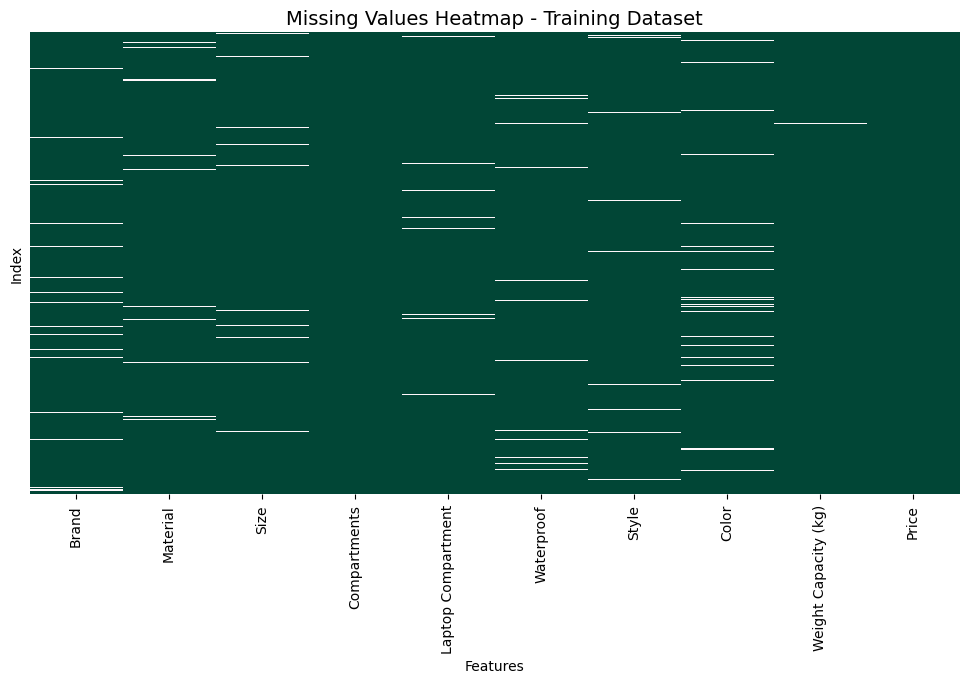

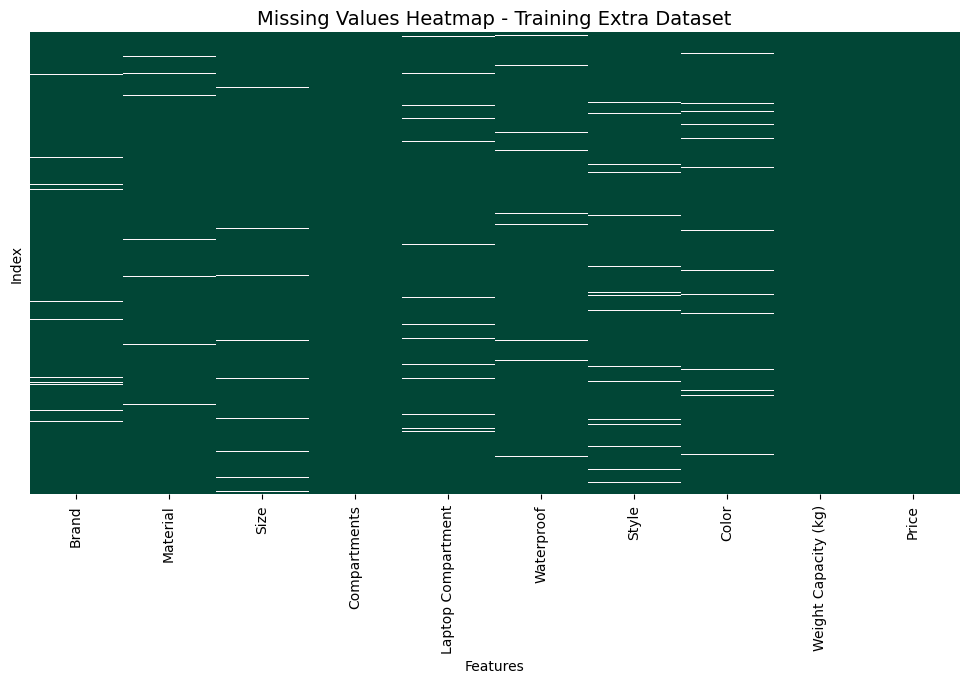

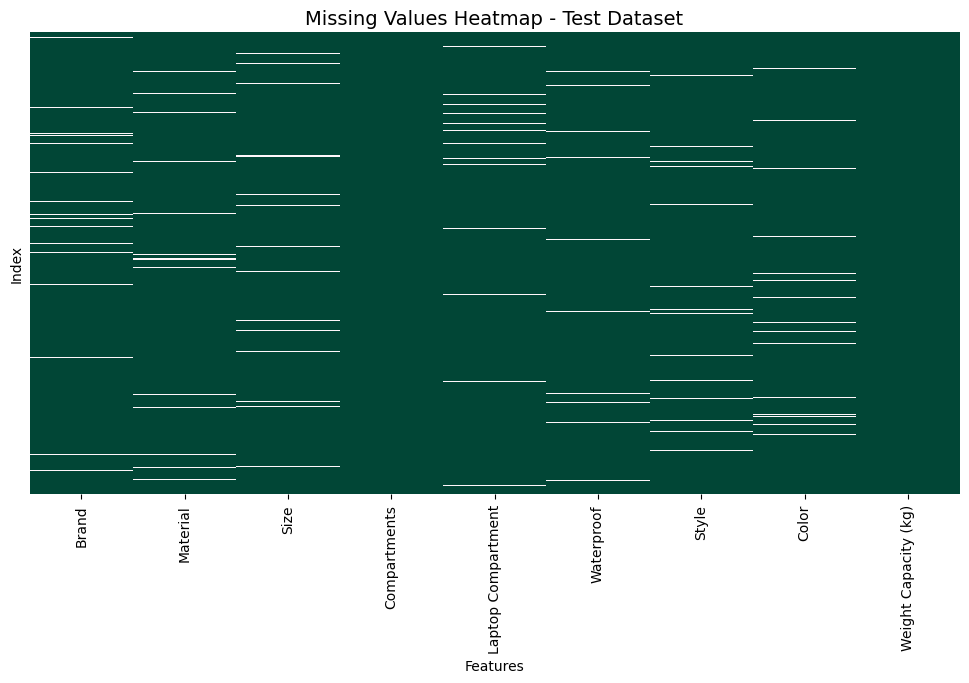

In [7]:
# Function to create a heatmap of missing values
def plot_missing_values_heatmap(df, title):
    plt.figure(figsize=(12, 6))
    sns.heatmap(df.isnull(), cmap='PuBuGn_r', cbar=False, yticklabels=False)
    plt.title(f'Missing Values Heatmap - {title}', fontsize=14)
    plt.xlabel("Features")
    plt.ylabel("Index")
    plt.show()

# Generate heatmaps for each dataset
plot_missing_values_heatmap(train_data, "Training Dataset")
plot_missing_values_heatmap(train_ex_data, "Training Extra Dataset")
plot_missing_values_heatmap(test_data, "Test Dataset")

In [8]:
# Function to calculate missing values, percentages, and data types
def missing_values_table(df):
    missing_count = df.isnull().sum()
    missing_percentage = 100 * missing_count / len(df)
    data_types = df.dtypes
    return pd.DataFrame({
        'Missing Values': missing_count,
        'Percentage (%)': missing_percentage,
        'Data Type': data_types
    })

# Create tables for train, train_extra, and test datasets
train_missing_table = missing_values_table(train_data)
train_extra_missing_table = missing_values_table(train_ex_data)
test_missing_table = missing_values_table(test_data)

# Display the tables (only features with missing values)
print("\nMissing Values Table - Training Dataset:\n")
display(train_missing_table[train_missing_table['Missing Values'] > 0])
print("\n")

print("\nMissing Values Table - Training Extra Dataset:\n")
display(train_extra_missing_table[train_extra_missing_table['Missing Values'] > 0])
print("\n")

print("\nMissing Values Table - Test Dataset:\n")
display(test_missing_table[test_missing_table['Missing Values'] > 0])


Missing Values Table - Training Dataset:



Missing Values  Percentage (%) Data Type
Brand                           9705        3.235000    object
Material                        8347        2.782333    object
Size                            6595        2.198333    object
Laptop Compartment              7444        2.481333    object
Waterproof                      7050        2.350000    object
Style                           7970        2.656667    object
Color                           9950        3.316667    object
Weight Capacity (kg)             138        0.046000   float64




Missing Values Table - Training Extra Dataset:



Missing Values  Percentage (%) Data Type
Brand                         117053        3.168460    object
Material                      102615        2.777644    object
Size                           81190        2.197699    object
Laptop Compartment             91089        2.465651    object
Waterproof                     87274        2.362385    object
Style                          96210        2.604270    object
Color                         123667        3.347492    object
Weight Capacity (kg)            1670        0.045205   float64




Missing Values Table - Test Dataset:



Missing Values  Percentage (%) Data Type
Brand                           6227          3.1135    object
Material                        5613          2.8065    object
Size                            4381          2.1905    object
Laptop Compartment              4962          2.4810    object
Waterproof                      4811          2.4055    object
Style                           5153          2.5765    object
Color                           6785          3.3925    object
Weight Capacity (kg)              77          0.0385   float64

#### **Overview of Missing Data**  
- **Categorical Features**: Missing values range from **~2.2% to ~3.35%** across all datasets.  
- **Numerical Feature (Weight Capacity)**: Minimal missing values (**<0.05%**) in all datasets.  

#### **Feature-Specific Observations**  
**Brand & Color Have the Highest Missing Rate (~3.3%)**  
   - These features may be missing due to inconsistencies in data collection or variations in product labeling.  
   - Since branding and color could impact pricing, careful handling is required.  

**Laptop Compartment & Waterproof (~2.4%)**  
   - As binary features, missing values might indicate uncertainty or missing specifications from manufacturers.  
   - Imputation with mode (**most common value: 'Yes'**) may be an effective strategy.  

**Weight Capacity Has Minimal Missing Data (~0.04%)**  
   - Since it's a numerical feature, mean or median imputation would be appropriate.  
   - Given its strong influence on price, retaining all available data is crucial.  

#### **Comparing Across Datasets**  
- **Similar missing value distributions** across Train, Extra Train, and Test sets indicate consistency.  
- The **Extra Train dataset has a slightly higher absolute number of missing values** due to its larger size, but the percentage remains similar.  


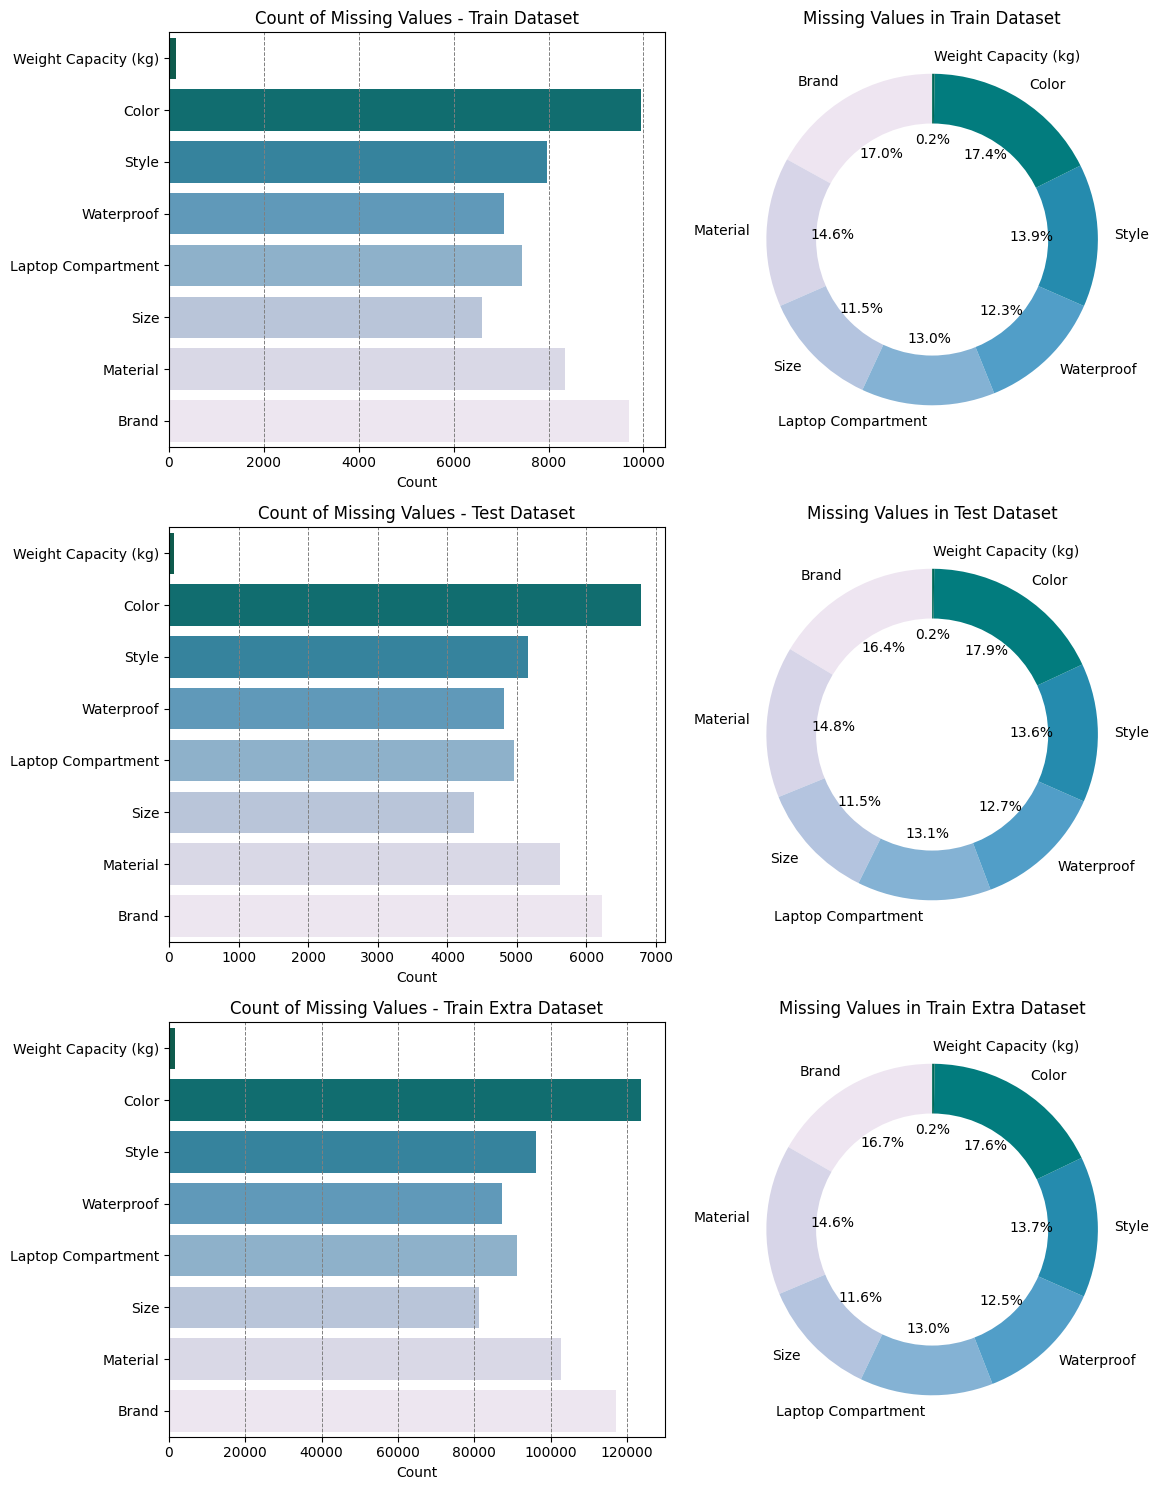

In [9]:
# Function to calculate missing values
def missing_values_table(df):
    missing_count = df.isnull().sum()
    return missing_count[missing_count > 0]

# Get missing values counts
train_null = missing_values_table(train_data)
test_null = missing_values_table(test_data)
train_ex_null = missing_values_table(train_ex_data)

fig, axes = plt.subplots(3, 2, figsize=(12, 15))

def create_donut_chart(data, ax, title):
    wedges, texts, autotexts = ax.pie(
        data,
        labels=data.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette("PuBuGn", len(data))
    )
    
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    ax.add_artist(centre_circle)
    ax.set_title(title)

sns.barplot(x=train_null.values, y=train_null.index, ax=axes[0, 0], palette='PuBuGn')
axes[0, 0].set_title('Count of Missing Values - Train Dataset')
axes[0, 0].set_xlabel('Count')
axes[0, 0].invert_yaxis()
axes[0, 0].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)

sns.barplot(x=test_null.values, y=test_null.index, ax=axes[1, 0], palette='PuBuGn')
axes[1, 0].set_title('Count of Missing Values - Test Dataset')
axes[1, 0].set_xlabel('Count')
axes[1, 0].invert_yaxis()
axes[1, 0].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)

sns.barplot(x=train_ex_null.values, y=train_ex_null.index, ax=axes[2, 0], palette='PuBuGn')
axes[2, 0].set_title('Count of Missing Values - Train Extra Dataset')
axes[2, 0].set_xlabel('Count')
axes[2, 0].invert_yaxis()
axes[2, 0].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)  

create_donut_chart(train_null, axes[0, 1], 'Missing Values in Train Dataset')
create_donut_chart(test_null, axes[1, 1], 'Missing Values in Test Dataset')
create_donut_chart(train_ex_null, axes[2, 1], 'Missing Values in Train Extra Dataset')

plt.tight_layout()
plt.show()

In [10]:
# Check for duplicated rows
print("\nDuplicate Rows in Train Data:", train_data.duplicated().sum())
print("\nDuplicate Rows in Train Extra Data:", train_ex_data.duplicated().sum())
print("\nDuplicate Rows in Test Data:", test_data.duplicated().sum())


Duplicate Rows in Train Data: 0

Duplicate Rows in Train Extra Data: 0

Duplicate Rows in Test Data: 0


<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Exploratory Data Analysis (EDA)</span>

<div style="border-radius: 15px; border: 2px solid #8B9467; padding: 10px; background: linear-gradient(135deg, #A1C9F2, #4CB391); text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);">
    <h1 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); font-weight: bold; margin-bottom: 5px; font-size: 28px; font-family: 'Roboto', sans-serif;">
        Exploratory Data Analysis (EDA)
    </h1>
</div>


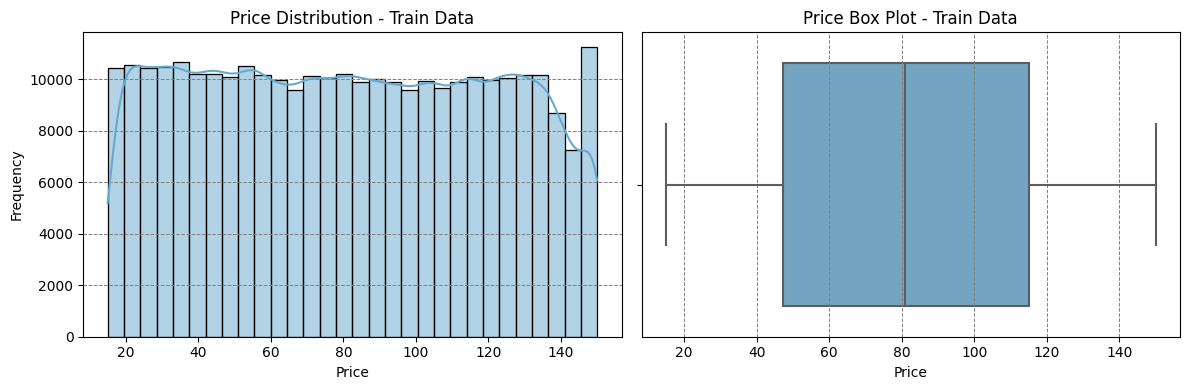

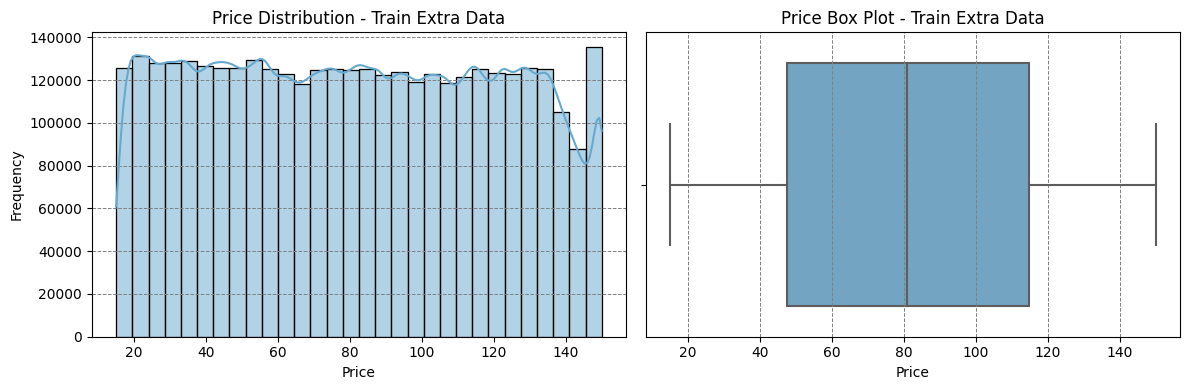

In [11]:
# Plotting Price Distribution for Train Data
plt.figure(figsize=(12, 4))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(train_data['Price'], bins=30, kde=True, color=sns.color_palette("PuBuGn", 1)[0])  
plt.title('Price Distribution - Train Data')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.7)  

# Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(x=train_data['Price'], color=sns.color_palette("PuBuGn", 1)[0])  
plt.title('Price Box Plot - Train Data')
plt.grid(axis='x', color='gray', linestyle='--', linewidth=0.7)  

plt.tight_layout()
plt.show()

# Repeat for Train Extra Data
plt.figure(figsize=(12, 4))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(train_ex_data['Price'], bins=30, kde=True, color=sns.color_palette("PuBuGn", 1)[0])  
plt.title('Price Distribution - Train Extra Data')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.7)  

# Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(x=train_ex_data['Price'], color=sns.color_palette("PuBuGn", 1)[0])  
plt.title('Price Box Plot - Train Extra Data')
plt.grid(axis='x', color='gray', linestyle='--', linewidth=0.7)  

plt.tight_layout()
plt.show()

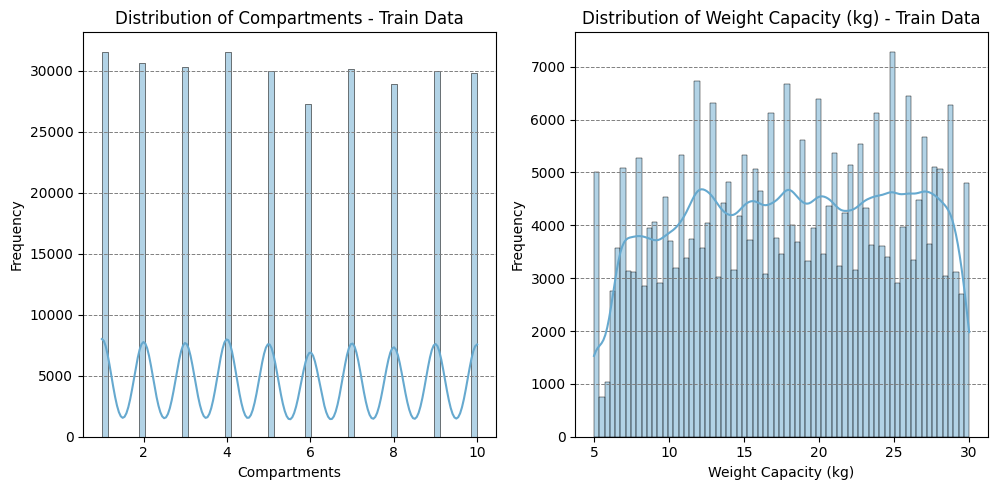

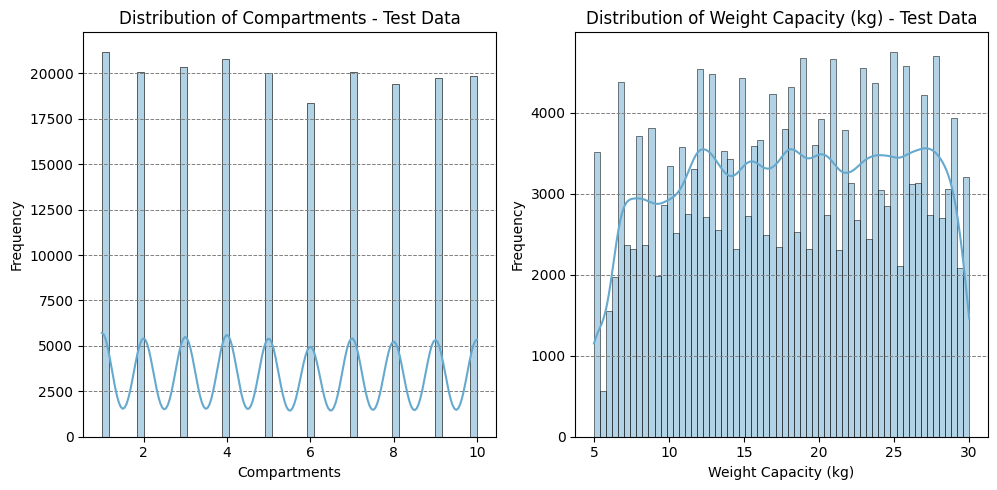

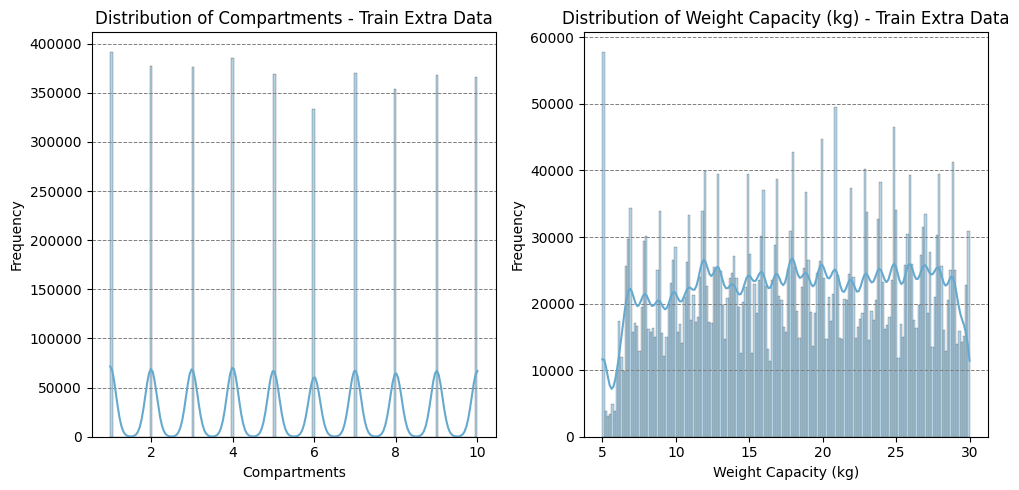

In [12]:
# Identify numerical columns (excluding 'Price' if it exists)
numerical_cols_train = train_data.select_dtypes(include=['number']).columns.tolist()
if 'Price' in numerical_cols_train:
    numerical_cols_train.remove('Price')

numerical_cols_test = test_data.select_dtypes(include=['number']).columns.tolist()
if 'Price' in numerical_cols_test:
    numerical_cols_test.remove('Price')
    
numerical_cols_train_ex = train_ex_data.select_dtypes(include=['number']).columns.tolist()
if 'Price' in numerical_cols_train_ex:
    numerical_cols_train_ex.remove('Price')

# Function to plot histograms for each numerical column
def plot_numerical_distributions(data, numerical_cols, title):
    num_cols = len(numerical_cols)
    num_rows = (num_cols // 3) + (num_cols % 3 > 0)  
    
    plt.figure(figsize=(15, 5 * num_rows))  

    for i, col in enumerate(numerical_cols, 1):
        plt.subplot(num_rows, 3, i)
        sns.histplot(data[col], kde=True, color=sns.color_palette("PuBuGn", 1)[0])  
        plt.title(f'Distribution of {col} - {title}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.7)  

    plt.tight_layout()
    plt.show()

# Plotting the distributions
plot_numerical_distributions(train_data, numerical_cols_train, 'Train Data')
plot_numerical_distributions(test_data, numerical_cols_test, 'Test Data')
plot_numerical_distributions(train_ex_data, numerical_cols_train_ex, 'Train Extra Data')

In [13]:
# Identify categorical columns
cat_columns_train = train_data.select_dtypes(include=['object']).columns.tolist()
cat_columns_test = test_data.select_dtypes(include=['object']).columns.tolist()
cat_columns_train_ex = train_ex_data.select_dtypes(include=['object']).columns.tolist()

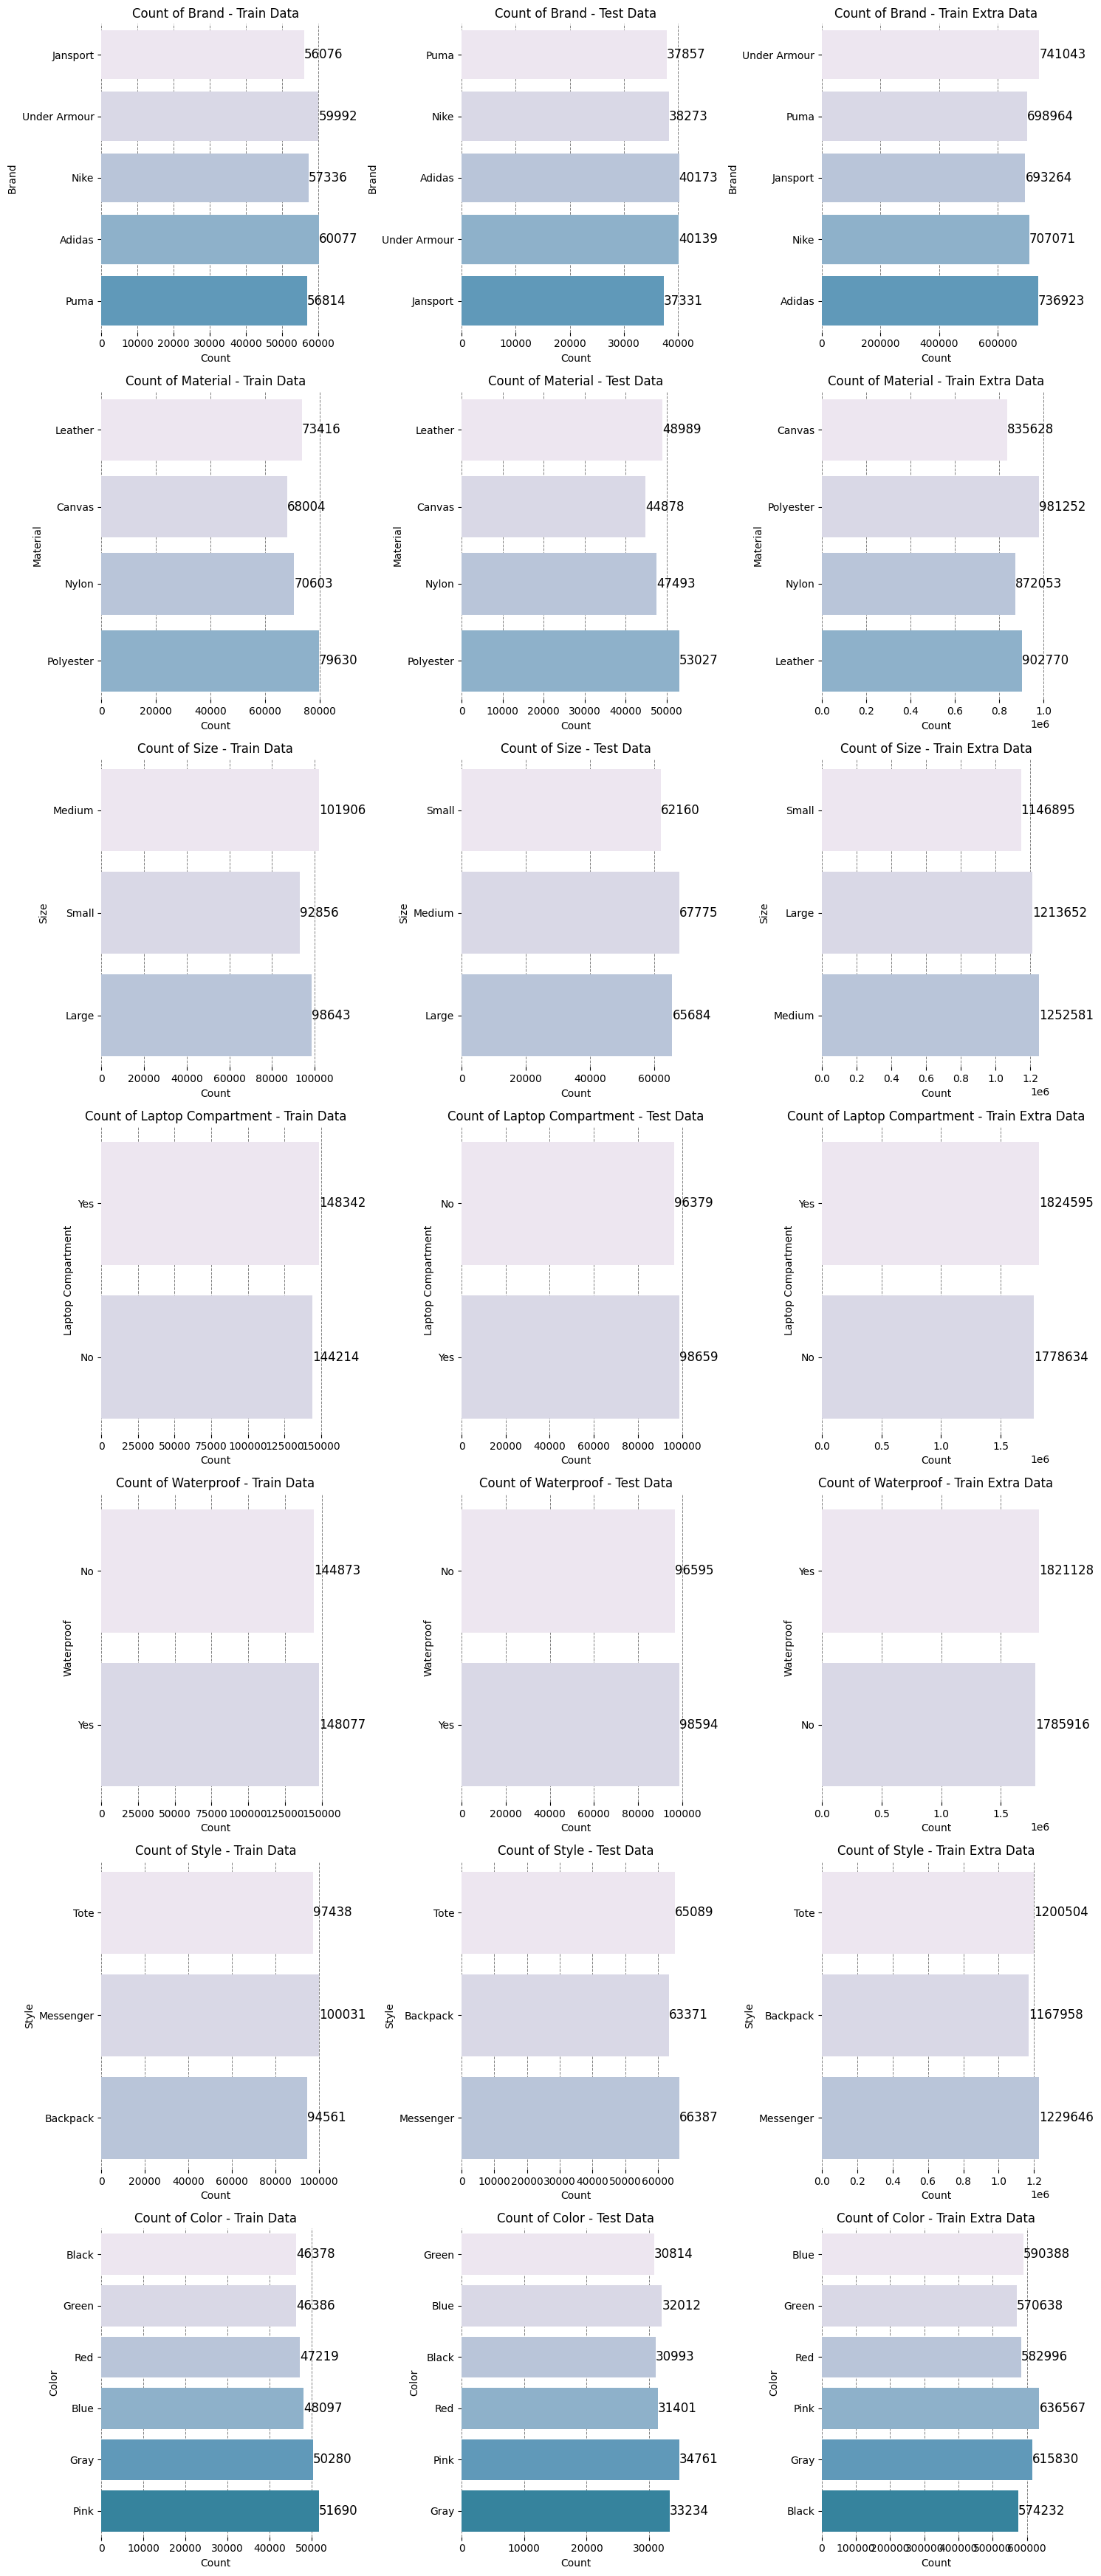

In [14]:
def plot_categorical_distributions_grid(cat_columns, datasets, titles):
    num_features = len(cat_columns)
    num_datasets = len(datasets)

    fig, axes = plt.subplots(num_features, num_datasets, figsize=(15, 5 * num_features))

    custom_palette = sns.color_palette("PuBuGn", 8)  

    for i, col in enumerate(cat_columns):
        for j, (data, title) in enumerate(zip(datasets, titles)):
            sns.countplot(y=col, data=data, ax=axes[i, j], palette=custom_palette)
            axes[i, j].set_title(f'Count of {col} - {title}')
            axes[i, j].set_xlabel('Count')
            axes[i, j].set_ylabel(col)

            for p in axes[i, j].patches:
                axes[i, j].annotate(f'{int(p.get_width())}', 
                                    (p.get_width(), p.get_y() + p.get_height() / 2), 
                                    ha='left', va='center', 
                                    color='black', fontsize=12)

            axes[i, j].set_axisbelow(True)  
            axes[i, j].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)  
            sns.despine(left=True, bottom=True)

    plt.tight_layout()
    plt.show()

datasets = [train_data, test_data, train_ex_data]
titles = ['Train Data', 'Test Data', 'Train Extra Data']

plot_categorical_distributions_grid(cat_columns_train, datasets, titles)

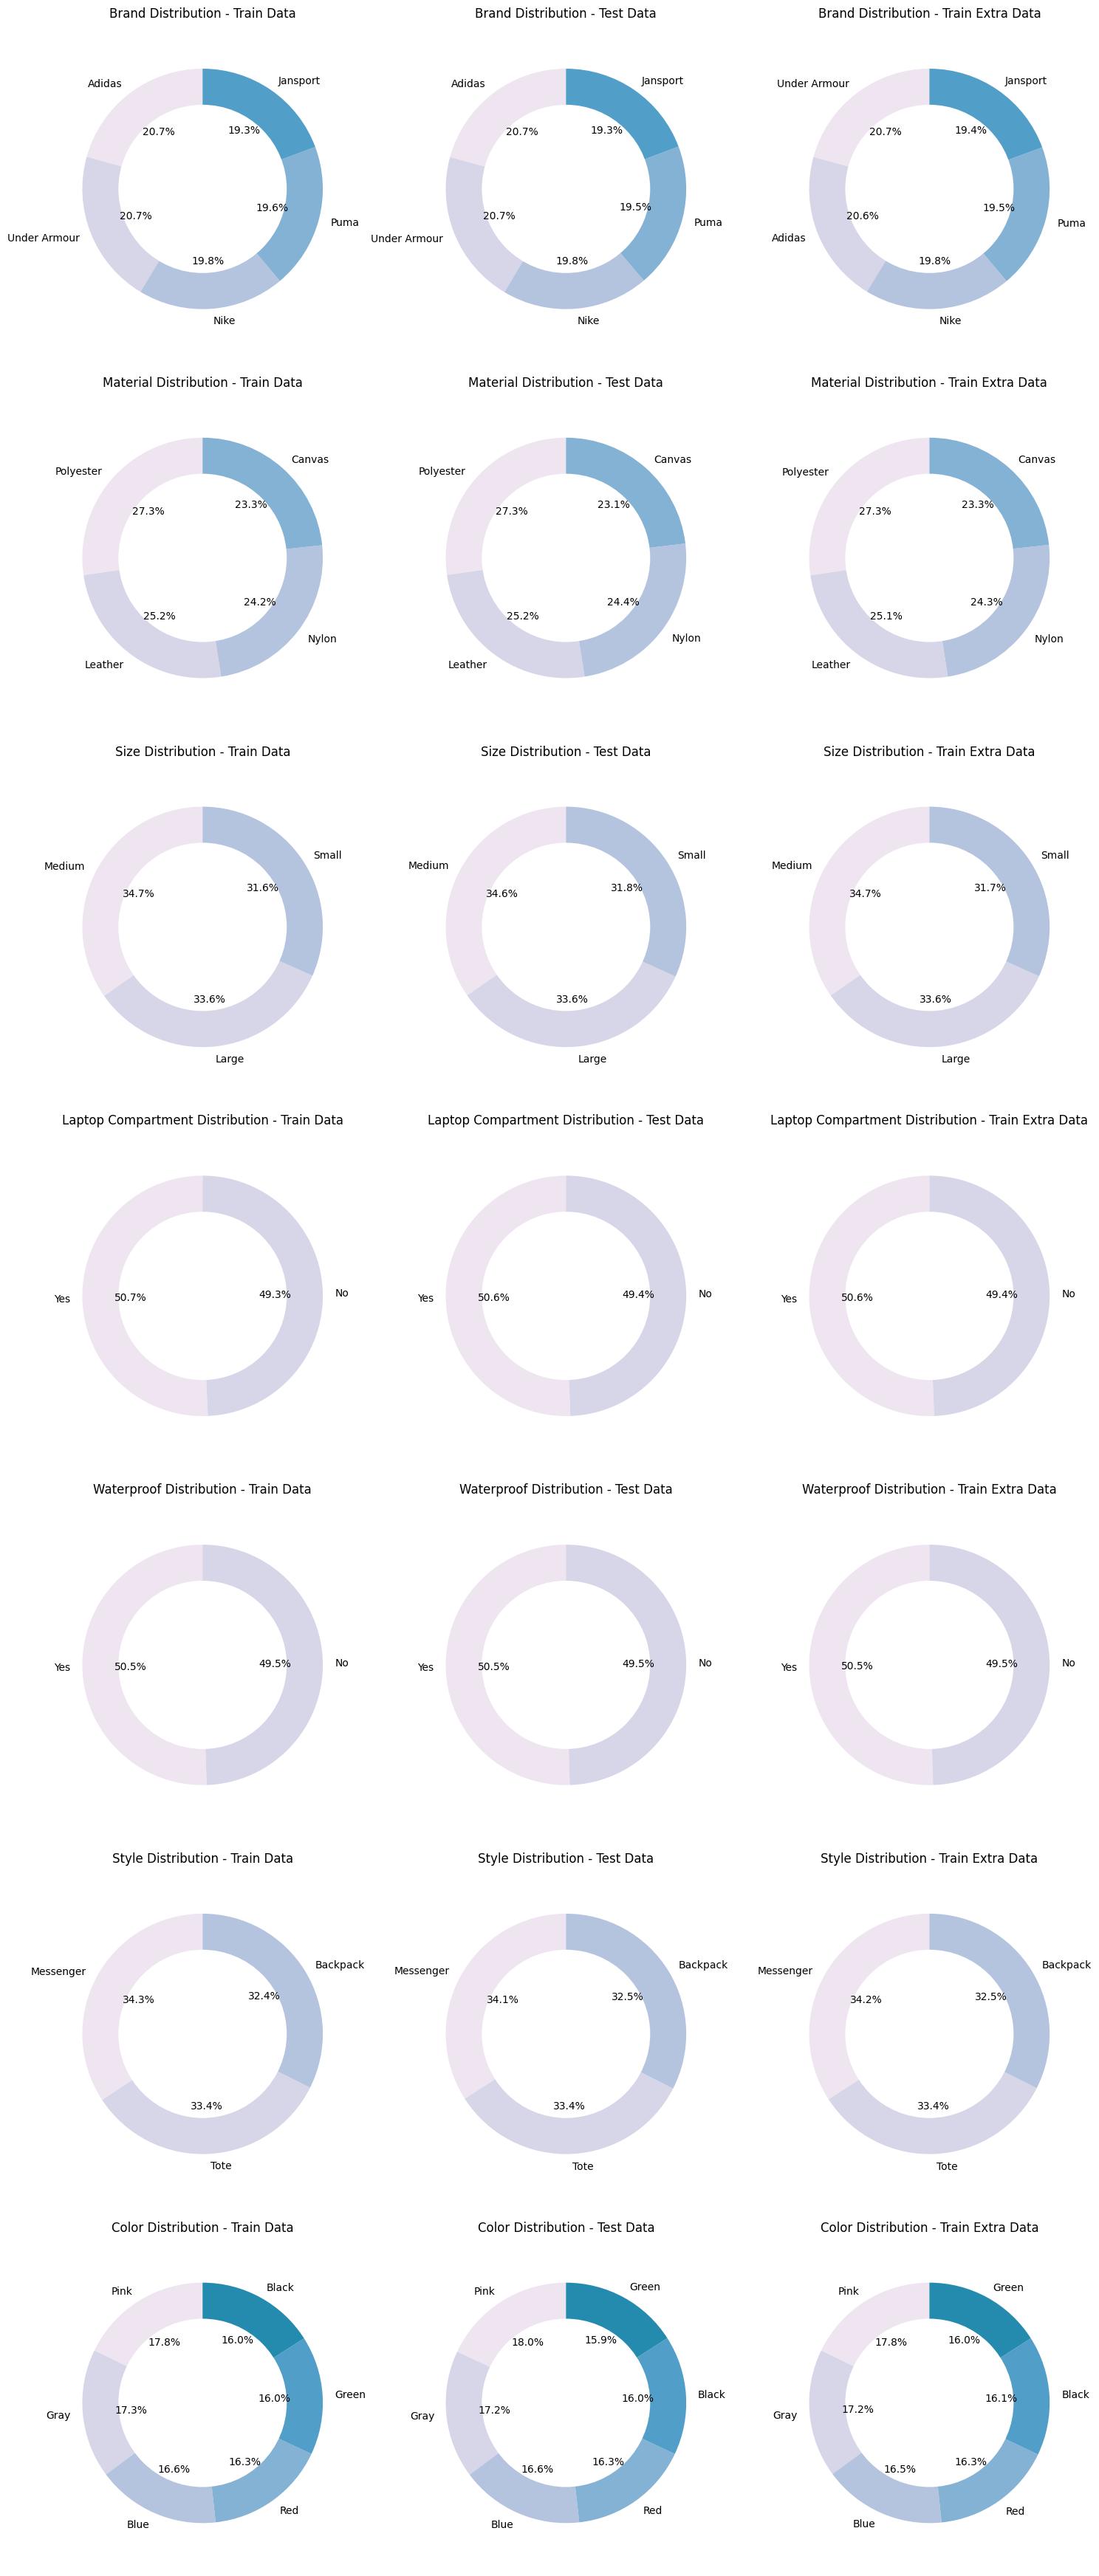

In [15]:
def plot_categorical_distributions_grid(cat_columns, datasets, titles):
    num_features = len(cat_columns)
    num_datasets = len(datasets)

    fig, axes = plt.subplots(num_features, num_datasets, figsize=(15, 5 * num_features))

    custom_palette = sns.color_palette("PuBuGn", 8) 

    for i, col in enumerate(cat_columns):
        for j, (data, title) in enumerate(zip(datasets, titles)):
            counts = data[col].value_counts()

            wedges, texts, autotexts = axes[i, j].pie(
                counts,
                labels=counts.index,
                autopct='%1.1f%%',
                startangle=90,
                colors=custom_palette[:len(counts)]
            )

            centre_circle = plt.Circle((0, 0), 0.70, fc='white')
            axes[i, j].add_artist(centre_circle)

            axes[i, j].set_title(f'{col} Distribution - {title}')
            axes[i, j].axis('equal')  

    plt.tight_layout()
    plt.show()

datasets = [train_data, test_data, train_ex_data]
titles = ['Train Data', 'Test Data', 'Train Extra Data']

plot_categorical_distributions_grid(cat_columns_train, datasets, titles)

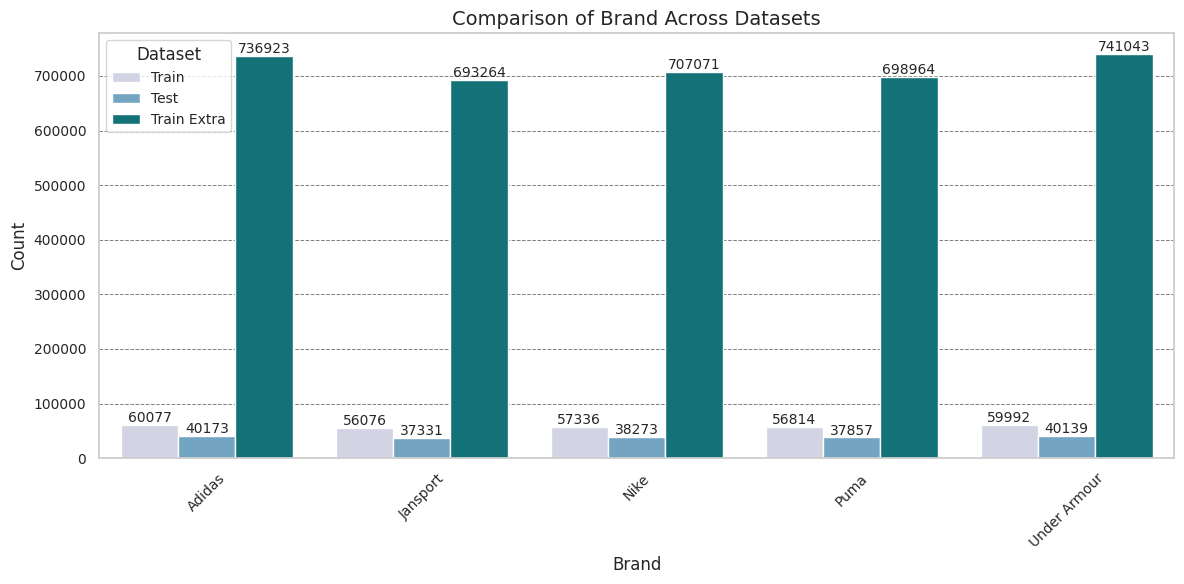

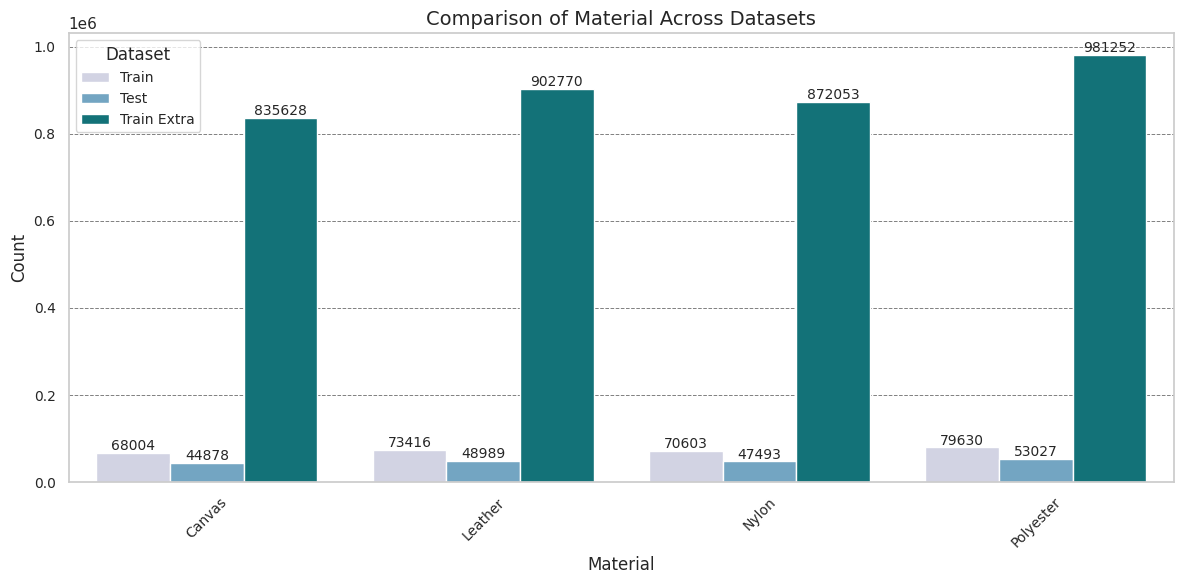

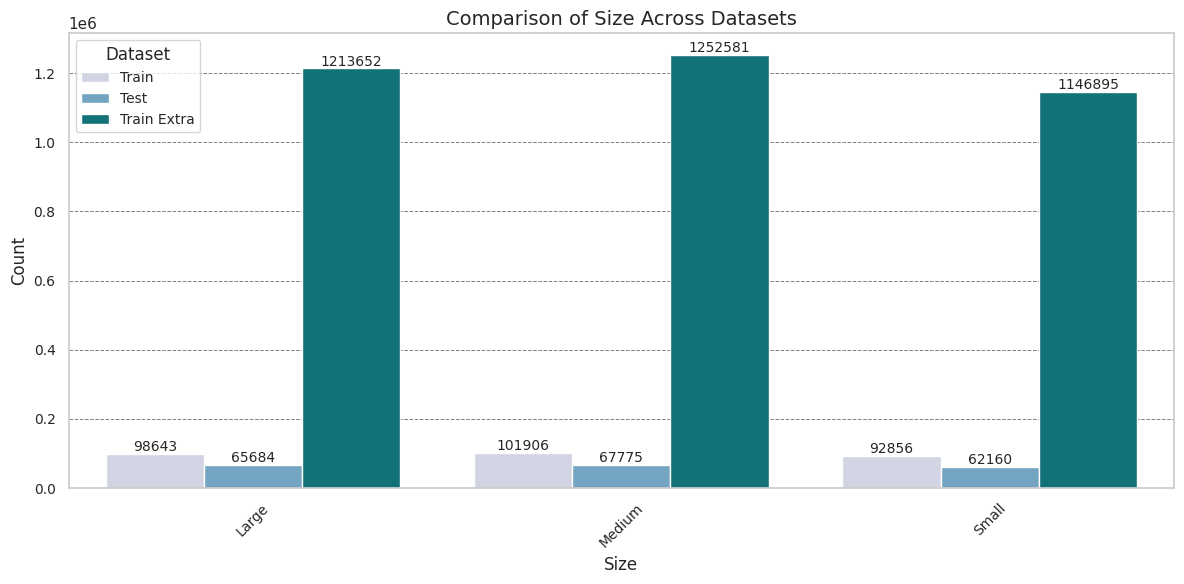

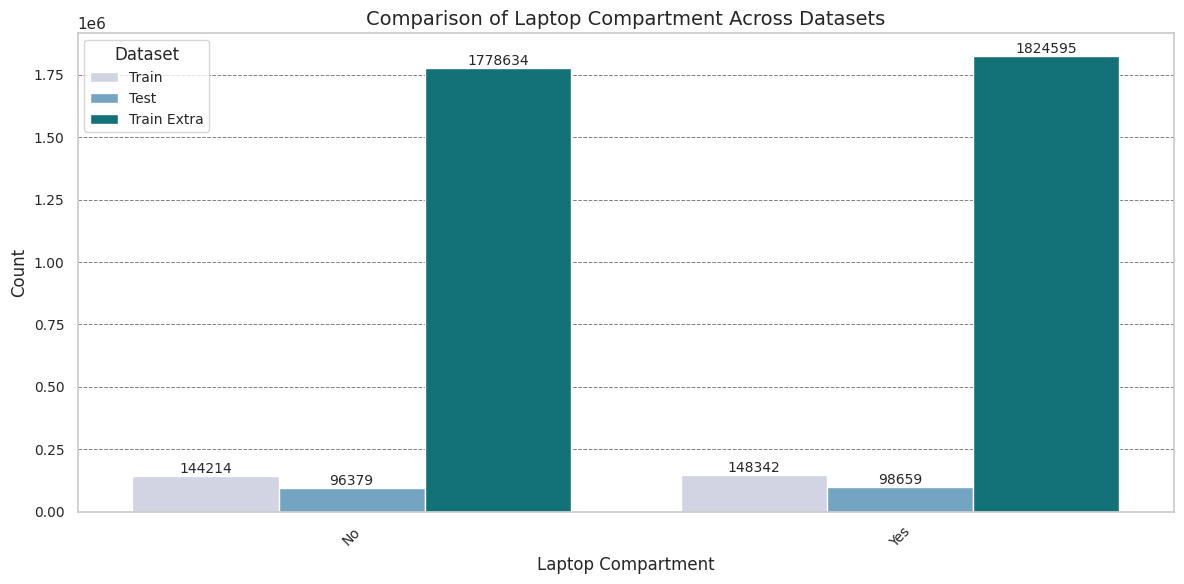

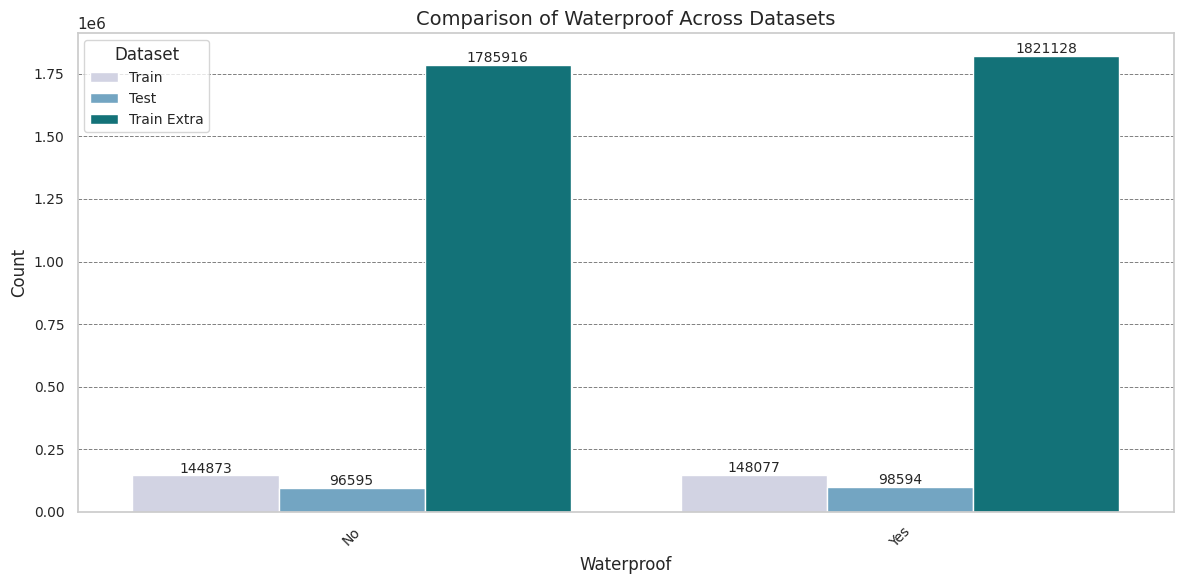

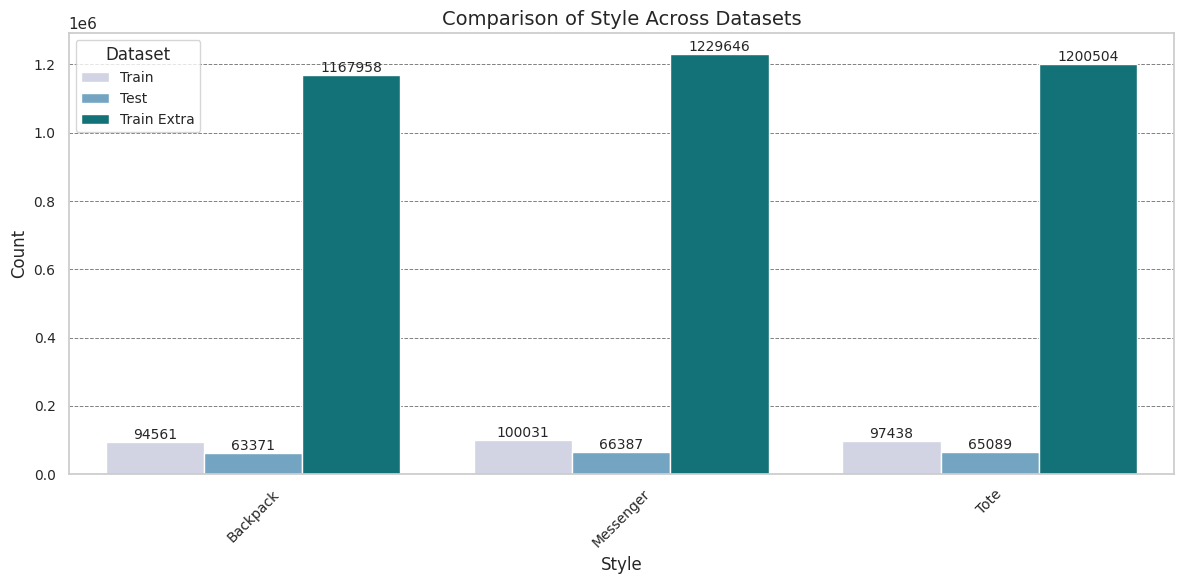

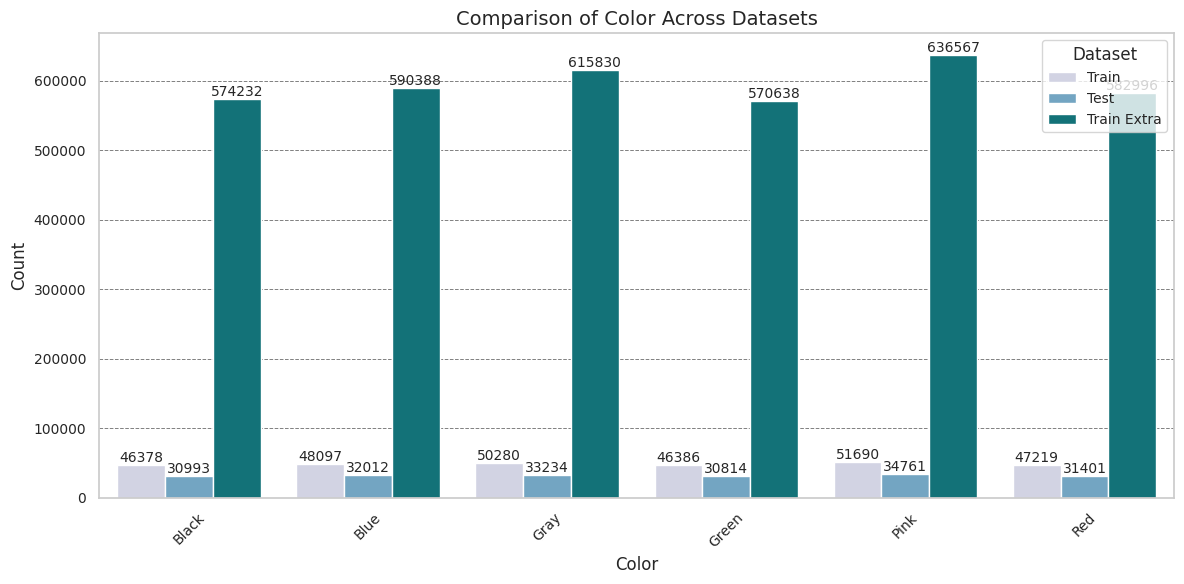

In [16]:
# Identify categorical columns
cat_columns_train = train_data.select_dtypes(include=['object']).columns.tolist()

def plot_grouped_bar(data1, data2, data3, cat_columns):
    sns.set(style="whitegrid", palette="PuBuGn")  
    
    for col in cat_columns:
        plt.figure(figsize=(12, 6))
        
        # Count occurrences in each dataset
        count_train = data1[col].value_counts().reset_index()
        count_train.columns = [col, 'Train']
        
        count_test = data2[col].value_counts().reset_index()
        count_test.columns = [col, 'Test']
        
        count_train_ex = data3[col].value_counts().reset_index()
        count_train_ex.columns = [col, 'Train Extra']
        
        # Merge counts into a single DataFrame
        merged_counts = count_train.merge(count_test, on=col, how='outer').merge(count_train_ex, on=col, how='outer').fillna(0)
        
        # Melt the DataFrame for easier plotting
        melted_counts = merged_counts.melt(id_vars=col, var_name='Dataset', value_name='Count')

        ax = sns.barplot(data=melted_counts, x=col, y='Count', hue='Dataset', palette="PuBuGn")
        
        for p in ax.patches:
            ax.annotate(f'{int(p.get_height())}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', 
                        xytext=(0, 5), textcoords='offset points',
                        fontsize=10)

        plt.title(f'Comparison of {col} Across Datasets', fontsize=14)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.xticks(rotation=45, fontsize=10)
        plt.yticks(fontsize=10)
        plt.legend(title='Dataset', fontsize=10)

        plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.7)  

        plt.tight_layout()
        plt.show()

plot_grouped_bar(train_data, test_data, train_ex_data, cat_columns_train)

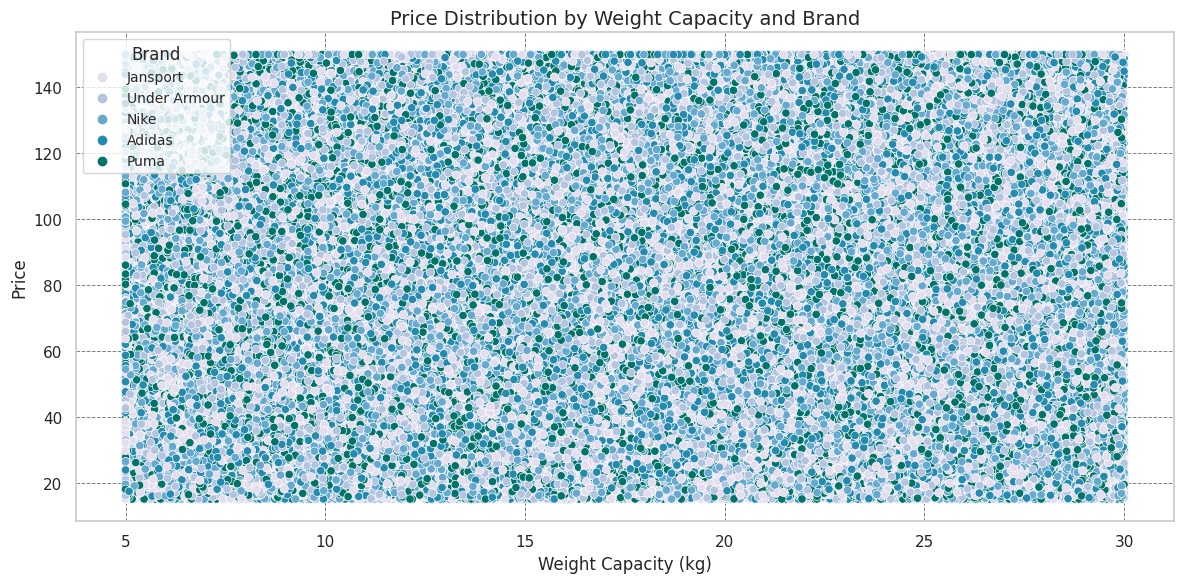

In [17]:
# Create a scatter plot of Price vs Weight Capacity (kg) colored by Brand
plt.figure(figsize=(12, 6))
sns.scatterplot(data=train_data, x='Weight Capacity (kg)', y='Price', hue='Brand', palette='PuBuGn')

plt.title('Price Distribution by Weight Capacity and Brand', fontsize=14)
plt.xlabel('Weight Capacity (kg)', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(title='Brand', fontsize=10)

plt.grid(axis='both', color='gray', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

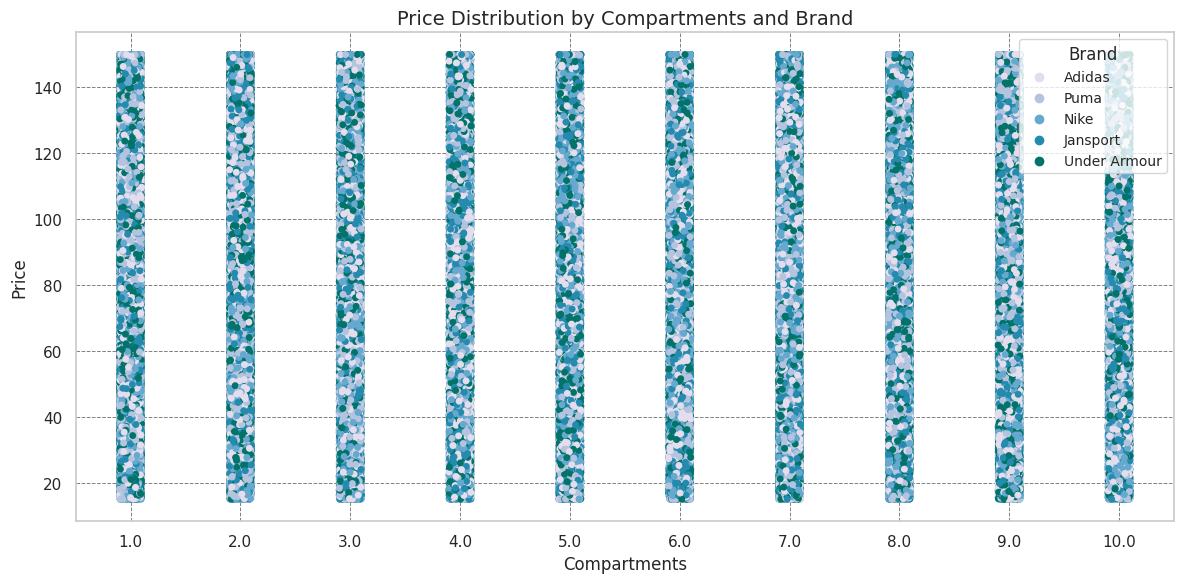

In [18]:
# Create a scatter plot of Price vs Compartments colored by Brand
# plt.figure(figsize=(12, 6))
# sns.scatterplot(data=train_data, x='Compartments', y='Price', hue='Brand', palette='PuBuGn')

plt.figure(figsize=(12, 6))
sns.stripplot(data=train_data, x='Compartments', y='Price', hue='Brand', palette='PuBuGn', jitter=True)

plt.title('Price Distribution by Compartments and Brand', fontsize=14)
plt.xlabel('Compartments', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(title='Brand', fontsize=10)

plt.grid(axis='both', color='gray', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

In [19]:
# Convert counts into a hierarchical structure
df = train_data.groupby(['Brand', 'Style']).size().reset_index(name='Count')

custom_palette = sns.color_palette("PuBuGn", 6)
custom_palette_hex = custom_palette.as_hex()

fig = px.sunburst(df, path=['Brand', 'Style'], values='Count',
                  title='Brand vs. Style Distribution',
                  color_discrete_sequence=custom_palette_hex)
fig.show()

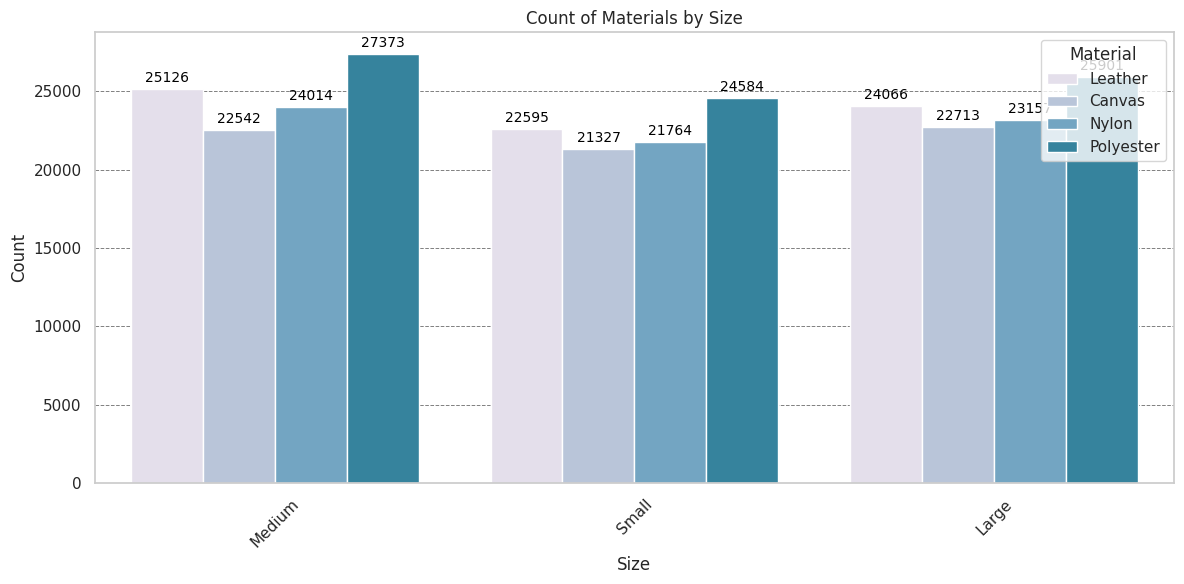

In [20]:
custom_palette = sns.color_palette("PuBuGn", len(train_data['Material'].unique()))

plt.figure(figsize=(12, 6))

sns.countplot(x='Size', hue='Material', data=train_data, palette=custom_palette)

plt.title('Count of Materials by Size')
plt.xlabel('Size')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.7)
plt.legend(title='Material')

for p in plt.gca().patches:
    plt.annotate(f'{int(p.get_height())}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='baseline', 
                 color='black', fontsize=10, 
                 xytext=(0, 5), 
                 textcoords='offset points')

plt.tight_layout()
plt.show()

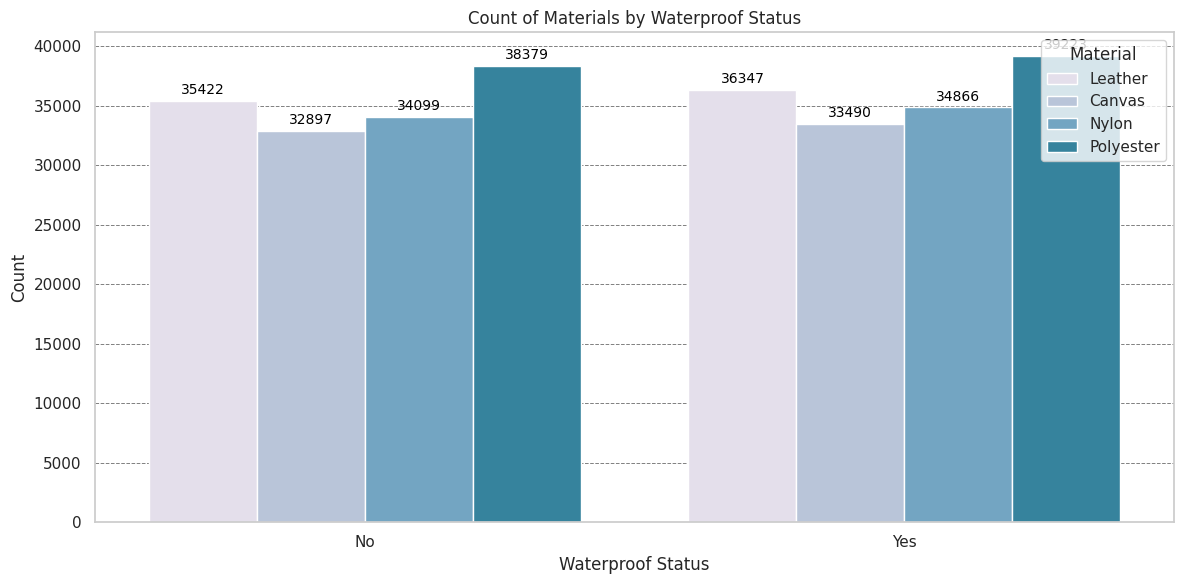

In [21]:
plt.figure(figsize=(12, 6))

# Create the count plot
sns.countplot(x='Waterproof', hue='Material', data=train_data, palette=custom_palette)

plt.title('Count of Materials by Waterproof Status')
plt.xlabel('Waterproof Status')
plt.ylabel('Count')
plt.xticks(rotation=0)  
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.7)
plt.legend(title='Material')

for p in plt.gca().patches:
    plt.annotate(f'{int(p.get_height())}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='baseline', 
                 color='black', fontsize=10, 
                 xytext=(0, 5), 
                 textcoords='offset points')

plt.tight_layout()
plt.show()

In [22]:
df = train_data.groupby(['Brand', 'Size', 'Waterproof']).size().reset_index(name='Count')

custom_palette = sns.color_palette("PuBuGn", 6)
custom_palette_hex = custom_palette.as_hex()

fig = px.sunburst(df, path=['Brand', 'Size', 'Waterproof'], values='Count',
                  title='Brand vs. Size vs. Waterproof Distribution',
                  color_discrete_sequence=custom_palette_hex)
fig.show()

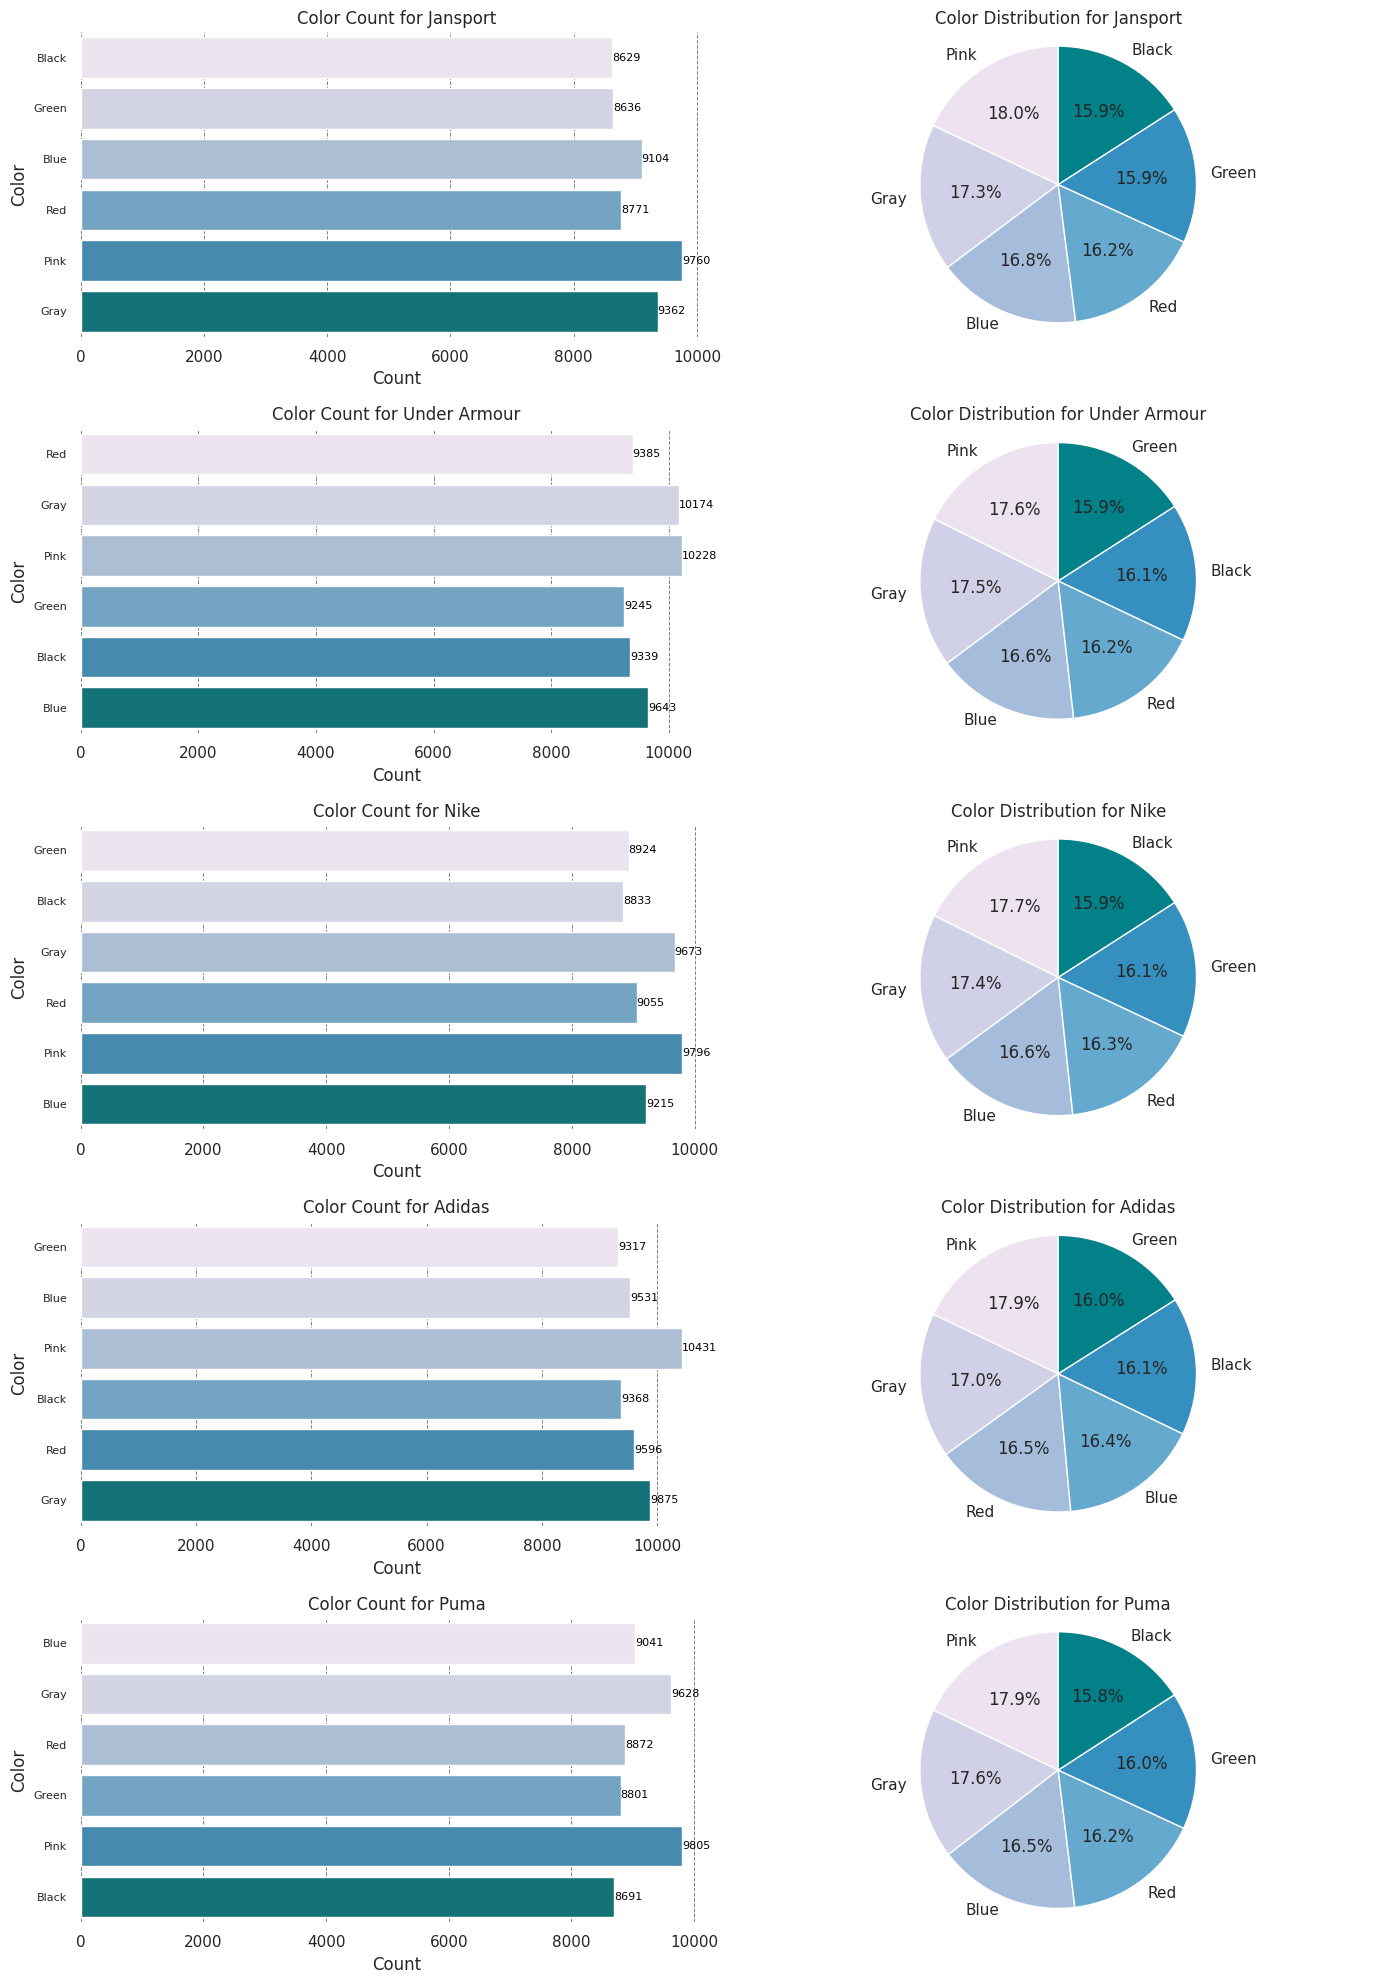

In [23]:
# Define the custom color palette
custom_palette = sns.color_palette("PuBuGn", len(train_data['Color'].unique()))

def plot_color_by_brand(ax, df, brand):
    filtered_data = df[df['Brand'] == brand].dropna(subset=['Color'])  # Drop rows with NaN in 'Color'
    
    sns.countplot(y='Color', data=filtered_data, ax=ax[0],
                 palette=custom_palette[:len(filtered_data['Color'].unique())])
    ax[0].set_title(f'Color Count for {brand}')
    ax[0].set_xlabel('Count')
    ax[0].set_ylabel('Color')
    ax[0].tick_params(axis='y', labelsize=8)

    for p in ax[0].patches:
        ax[0].annotate(f'{int(p.get_width())}',
                        (p.get_width(), p.get_y() + p.get_height() / 2),
                        ha='left', va='center',
                        color='black', fontsize=8)

    ax[0].set_axisbelow(True)
    ax[0].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)  
    sns.despine(left=True, bottom=True)

    color_counts = filtered_data['Color'].value_counts()
    ax[1].pie(color_counts, labels=color_counts.index,
               autopct='%1.1f%%', startangle=90,
               colors=custom_palette[:len(color_counts)])
    ax[1].set_title(f'Color Distribution for {brand}')
    ax[1].axis('equal')
  
valid_brands = [brand for brand in train_data['Brand'].unique() 
               if train_data[train_data['Brand'] == brand].dropna(subset=['Color']).shape[0] > 0]

num_brands = len(valid_brands)

fig, axes = plt.subplots(num_brands, 2, figsize=(14, 4*num_brands))

for i, brand in enumerate(valid_brands):
    plot_color_by_brand(axes[i], train_data, brand)

plt.tight_layout()
plt.show()

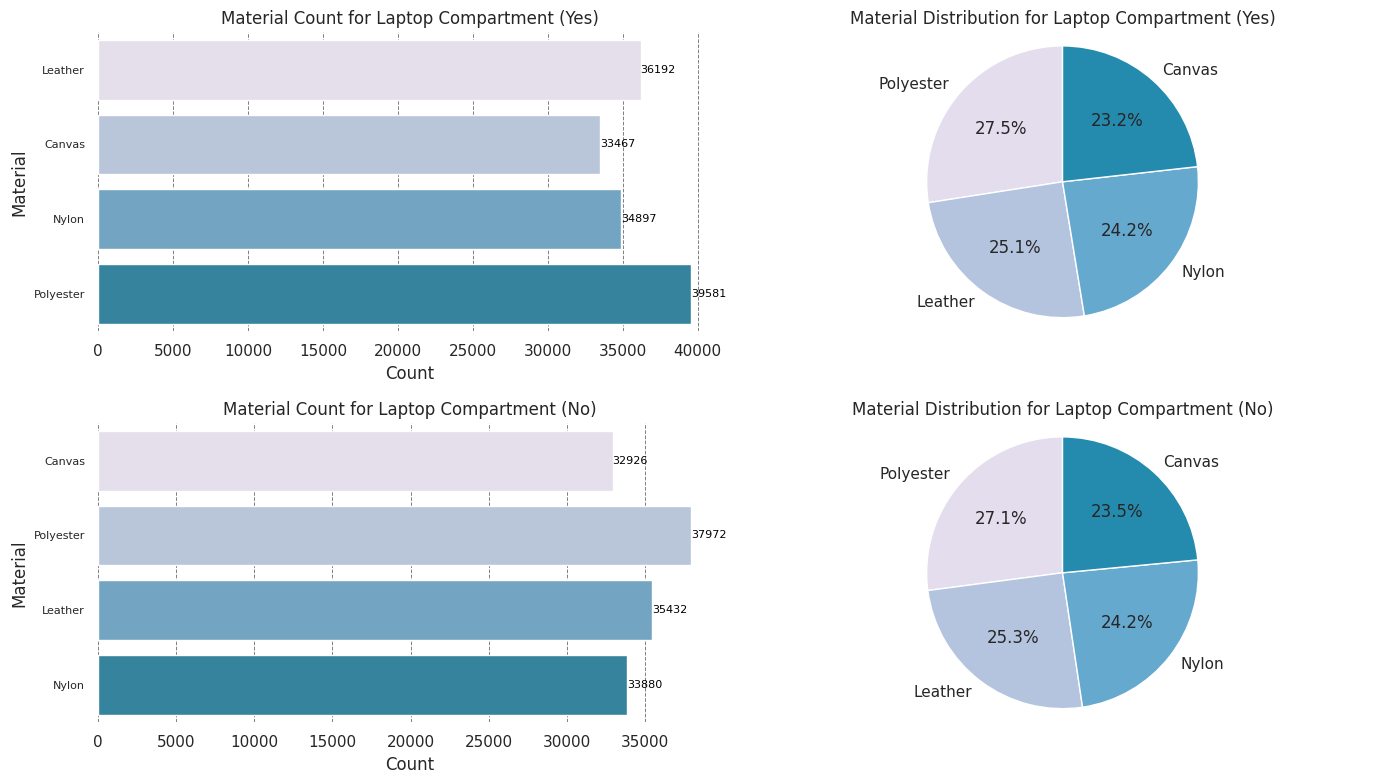

In [24]:
custom_palette = sns.color_palette("PuBuGn", len(train_data['Material'].unique()))

def plot_material_by_compartment(ax, df, compartment):
    filtered_data = df[df['Laptop Compartment'] == compartment].dropna(subset=['Material'])  # Drop rows with NaN in 'Material'
    
    if filtered_data.empty:  # Check if filtered data is empty
        ax[0].set_title(f'No Data for {compartment}')
        ax[1].set_title(f'No Data for {compartment}')
        return
    
    sns.countplot(y='Material', data=filtered_data, ax=ax[0],
                 palette=custom_palette[:len(filtered_data['Material'].unique())])
    ax[0].set_title(f'Material Count for Laptop Compartment ({compartment})')
    ax[0].set_xlabel('Count')
    ax[0].set_ylabel('Material')
    ax[0].tick_params(axis='y', labelsize=8)

    for p in ax[0].patches:
        ax[0].annotate(f'{int(p.get_width())}',
                        (p.get_width(), p.get_y() + p.get_height() / 2),
                        ha='left', va='center',
                        color='black', fontsize=8)

    ax[0].set_axisbelow(True)
    ax[0].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)  
    sns.despine(left=True, bottom=True)

    material_counts = filtered_data['Material'].value_counts()
    ax[1].pie(material_counts, labels=material_counts.index,
               autopct='%1.1f%%', startangle=90,
               colors=custom_palette[:len(material_counts)])
    ax[1].set_title(f'Material Distribution for Laptop Compartment ({compartment})')
    ax[1].axis('equal')
  
# Filter compartments with data
valid_compartments = [compartment for compartment in train_data['Laptop Compartment'].unique() 
                     if train_data[train_data['Laptop Compartment'] == compartment].dropna(subset=['Material']).shape[0] > 0]

num_compartments = len(valid_compartments)

fig, axes = plt.subplots(num_compartments, 2, figsize=(14, 4*num_compartments))

for i, compartment in enumerate(valid_compartments):
    plot_material_by_compartment(axes[i], train_data, compartment)

plt.tight_layout()
plt.show()

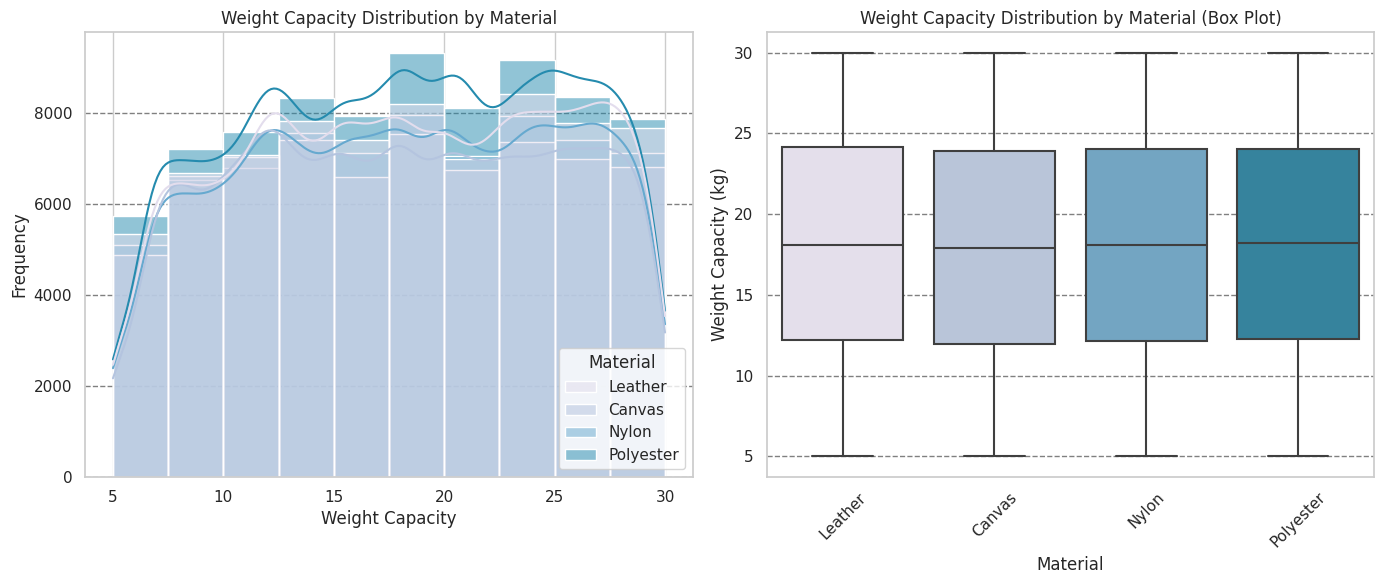

In [25]:
custom_palette = sns.color_palette("PuBuGn", len(train_data['Material'].unique()))

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Scatter Plot
sns.histplot(data=train_data, x='Weight Capacity (kg)', hue='Material',
             bins=10, palette=custom_palette,
             ax=axes[0], kde=True)
axes[0].set_title('Weight Capacity Distribution by Material')
axes[0].set_xlabel('Weight Capacity')
axes[0].set_ylabel('Frequency')
axes[0].set_axisbelow(True)
axes[0].grid(axis='y', color='gray', linestyle='--')

# Box Plot
sns.boxplot(x='Material', y='Weight Capacity (kg)', data=train_data, palette=custom_palette, ax=axes[1])
axes[1].set_title('Weight Capacity Distribution by Material (Box Plot)')
axes[1].set_xlabel('Material')
axes[1].set_ylabel('Weight Capacity (kg)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', color='gray', linestyle='--')

plt.tight_layout()
plt.show()

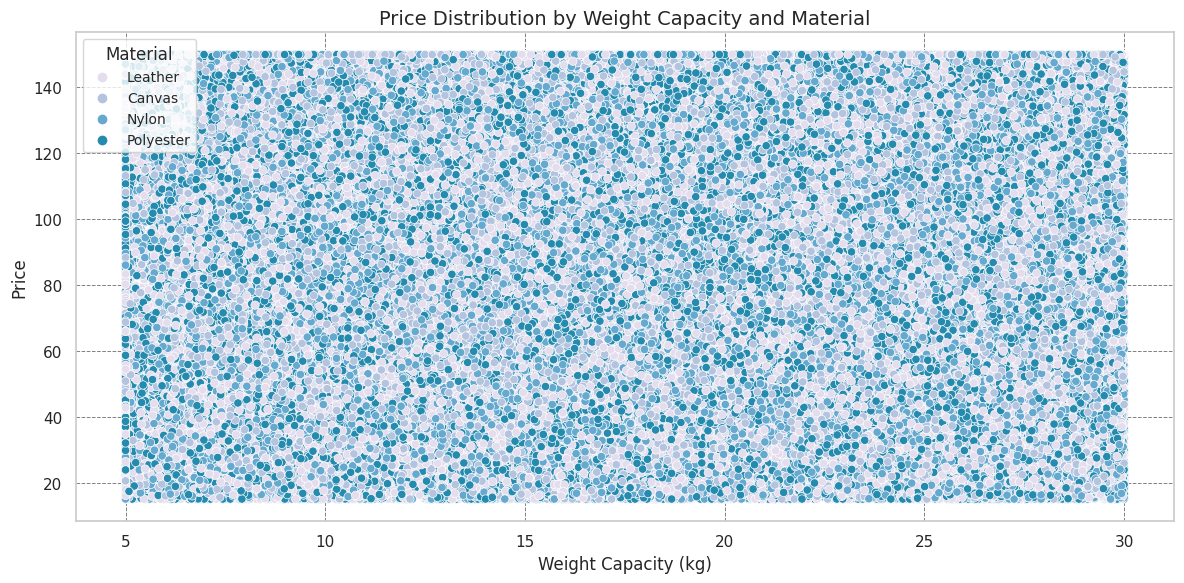

In [26]:
# Define the custom color palette
custom_palette = sns.color_palette("PuBuGn", len(train_data['Material'].unique()))

plt.figure(figsize=(12, 6))

# Create the scatter plot
sns.scatterplot(data=train_data, x='Weight Capacity (kg)', y='Price', hue='Material', palette=custom_palette)

plt.title('Price Distribution by Weight Capacity and Material', fontsize=14)
plt.xlabel('Weight Capacity (kg)', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(title='Material', fontsize=10)

plt.grid(axis='both', color='gray', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Preprocessing</span>

<div style="border-radius: 15px; border: 2px solid #8B9467; padding: 10px; background: linear-gradient(135deg, #A1C9F2, #4CB391); text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);">
    <h1 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); font-weight: bold; margin-bottom: 5px; font-size: 28px; font-family: 'Roboto', sans-serif;">
        Data Preprocessing
    </h1>
</div>

## Merge the training datasets

In [27]:
merged_train_data = pd.concat([train_data, train_ex_data], ignore_index=True)

# Verify the shapes of the datasets
print("Shape of Train Data:", train_data.shape)
print("Shape of Train Extra Data:", train_ex_data.shape)
print("Shape of Merged Train Data:", merged_train_data.shape)

# Display the merged dataset
print("\nMerged Data Sample:")
display(merged_train_data.head())

Shape of Train Data: (300000, 10)
Shape of Train Extra Data: (3694318, 10)
Shape of Merged Train Data: (3994318, 10)

Merged Data Sample:


Brand Material    Size  Compartments Laptop Compartment Waterproof  \
0      Jansport  Leather  Medium           7.0                Yes         No   
1      Jansport   Canvas   Small          10.0                Yes        Yes   
2  Under Armour  Leather   Small           2.0                Yes         No   
3          Nike    Nylon   Small           8.0                Yes         No   
4        Adidas   Canvas  Medium           1.0                Yes        Yes   

       Style  Color  Weight Capacity (kg)      Price  
0       Tote  Black             11.611723  112.15875  
1  Messenger  Green             27.078537   68.88056  
2  Messenger    Red             16.643760   39.17320  
3  Messenger  Green             12.937220   80.60793  
4  Messenger  Green             17.749338   86.02312

#### **Dataset Sizes & Growth After Merging**  
- **Train Data:** **300,000** samples, **10** features.  
- **Train Extra Data:** **3,694,318** samples, **10** features.  
- **Merged Train Data:** **3,994,318** samples, retaining all **10** features.  
- The merged dataset **increased by ~12x** compared to the original Train Data, significantly enriching the data for model training.  

#### **Data Consistency & Structure**  
**Feature Consistency**  
   - Both Train and Extra Train datasets have the **same 10 features**, ensuring a smooth merge.  
   - No feature loss or duplication occurred.  


In [28]:
# Display data types before merging
print("Data types before merging:")
print("Train Data Types:\n", train_data.dtypes)
print("\nTrain Extra Data Types:\n", train_ex_data.dtypes)

# Display data types after merging
print("\nData Types of Merged Train Data:")
print(merged_train_data.dtypes)

Data types before merging:
Train Data Types:
 Brand                    object
Material                 object
Size                     object
Compartments            float64
Laptop Compartment       object
Waterproof               object
Style                    object
Color                    object
Weight Capacity (kg)    float64
Price                   float64
dtype: object

Train Extra Data Types:
 Brand                    object
Material                 object
Size                     object
Compartments            float64
Laptop Compartment       object
Waterproof               object
Style                    object
Color                    object
Weight Capacity (kg)    float64
Price                   float64
dtype: object

Data Types of Merged Train Data:
Brand                    object
Material                 object
Size                     object
Compartments            float64
Laptop Compartment       object
Waterproof               object
Style                    object
Co

## Handling Missing Data

In [29]:
# Identify missing values in the merged dataset
missing_values = merged_train_data.isnull().sum()

# Display missing values and their counts
print("Missing Values in Merged Dataset:")
print(missing_values[missing_values > 0])  

Missing Values in Merged Dataset:
Brand                   126758
Material                110962
Size                     87785
Laptop Compartment       98533
Waterproof               94324
Style                   104180
Color                   133617
Weight Capacity (kg)      1808
dtype: int64


#### **Initial Missing Values in Merged Dataset**  
- **Brand, Color, and Style** had the highest number of missing values (**~3.3% of data**).  
- **Weight Capacity (kg)** had the lowest missing percentage (**0.045%**), indicating strong numerical data integrity.  
- Missing values were predominantly in categorical features (`Brand, Material, Size, Style`), which could affect model performance if not handled properly.  


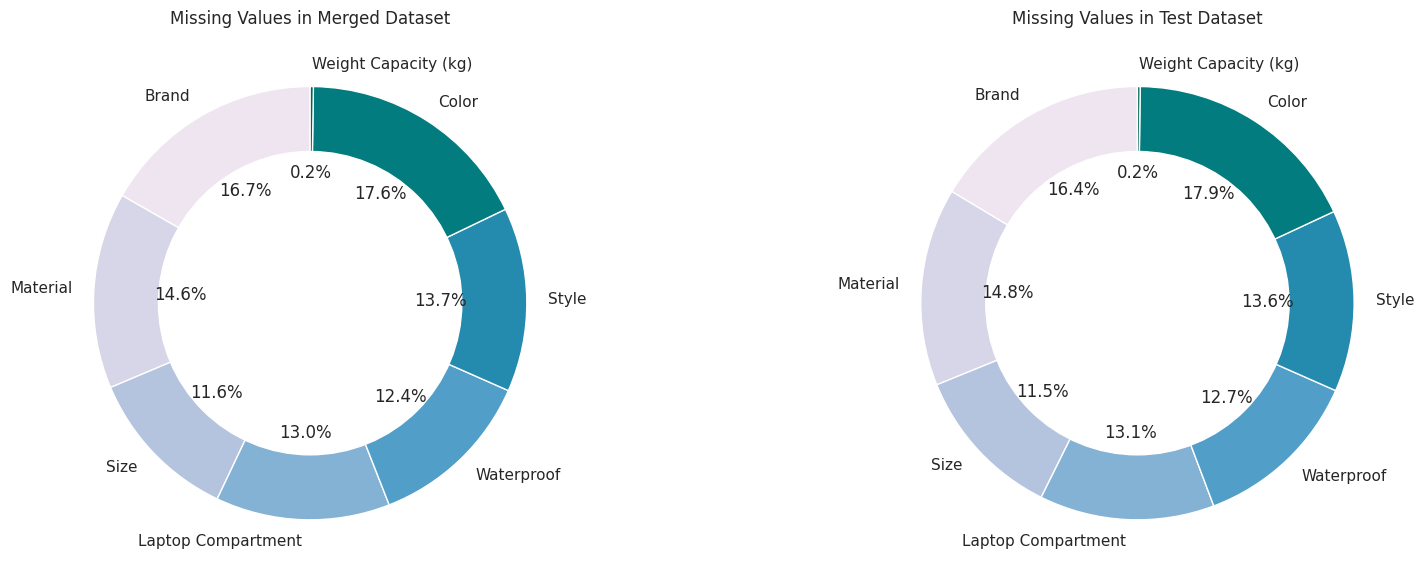

In [30]:
# Identify missing values in each dataset
missing_merged_train = merged_train_data.isnull().sum()
missing_test = test_data.isnull().sum()

def create_donut_chart(data, ax, title):
    missing_values = data[data > 0]
    
    wedges, texts, autotexts = ax.pie(
        missing_values,
        labels=missing_values.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette("PuBuGn", len(missing_values))
    )
    
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    ax.add_artist(centre_circle)
    ax.set_title(title)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

create_donut_chart(missing_merged_train, axes[0], 'Missing Values in Merged Dataset')
create_donut_chart(missing_test, axes[1], 'Missing Values in Test Dataset')

plt.tight_layout()
plt.show()

## Handling Missing Values - Numerical Columns

In [31]:
# Impute missing numerical data with median values
for col in test_data.select_dtypes(include=['number']).columns:
    median_value = merged_train_data[col].median()
    merged_train_data[col].fillna(median_value, inplace=True)
    test_data[col].fillna(median_value, inplace=True)

In [32]:
# Function to create a summary table for missing values and data types
def missing_values_summary(df):
    missing_count = df.isnull().sum()
    data_types = df.dtypes
    return pd.DataFrame({
        'Data Type': data_types,
        'Missing Values Count': missing_count
    })

# Create summary tables for merged train and test datasets
merged_train_summary = missing_values_summary(merged_train_data)
test_summary = missing_values_summary(test_data)

# Filter to show only columns with missing values
print("Merged Train Dataset Summary (Post-Imputation):")
print(merged_train_summary[merged_train_summary['Missing Values Count'] > 0])

print("\nTest Dataset Summary (Post-Imputation):")
print(test_summary[test_summary['Missing Values Count'] > 0])

Merged Train Dataset Summary (Post-Imputation):
                   Data Type  Missing Values Count
Brand                 object                126758
Material              object                110962
Size                  object                 87785
Laptop Compartment    object                 98533
Waterproof            object                 94324
Style                 object                104180
Color                 object                133617

Test Dataset Summary (Post-Imputation):
                   Data Type  Missing Values Count
Brand                 object                  6227
Material              object                  5613
Size                  object                  4381
Laptop Compartment    object                  4962
Waterproof            object                  4811
Style                 object                  5153
Color                 object                  6785


## Handling Missing Values - Categorical Columns

In [33]:
# Impute missing object data with 'None'
for col in merged_train_data.select_dtypes(include=['object']).columns:
    merged_train_data[col].fillna('None', inplace=True)
    test_data[col].fillna('None', inplace=True)

In [34]:
# Function to create a summary table for missing values and data types
def missing_values_summary(df):
    missing_count = df.isnull().sum()
    data_types = df.dtypes
    return pd.DataFrame({
        'Data Type': data_types,
        'Missing Values Count': missing_count
    })

# Create summary tables for merged train and test datasets
merged_train_summary = missing_values_summary(merged_train_data)
test_summary = missing_values_summary(test_data)

print("Merged Train Dataset Summary (Post-Imputation):")
print(merged_train_summary)

print("\nTest Dataset Summary (Post-Imputation):")
print(test_summary)

Merged Train Dataset Summary (Post-Imputation):
                     Data Type  Missing Values Count
Brand                   object                     0
Material                object                     0
Size                    object                     0
Compartments           float64                     0
Laptop Compartment      object                     0
Waterproof              object                     0
Style                   object                     0
Color                   object                     0
Weight Capacity (kg)   float64                     0
Price                  float64                     0

Test Dataset Summary (Post-Imputation):
                     Data Type  Missing Values Count
Brand                   object                     0
Material                object                     0
Size                    object                     0
Compartments           float64                     0
Laptop Compartment      object                     0
Waterproof

#### **Imputation Strategies Used**  
**Numerical Features** (`Weight Capacity (kg)`)  
   - Missing values were **imputed with the median**, ensuring no skewing from extreme values.  

**Categorical Features** (`Brand, Material, Size, Laptop Compartment, Waterproof, Style, Color`)  
   - Missing values were **replaced with 'None'**, preserving data structure while preventing null-related errors in model training.

#### **Post-Imputation Data Quality**  
**Zero Missing Values Across All Features**  
   - **Merged Train and Test datasets now have 100% completeness**, reducing potential bias from missing data.  
   - Ensures **consistent feature availability** across training and test sets.  

**Improved Model Stability**  
   - Imputation helps avoid errors during model training and prevents unwanted biases from dropping rows with missing data.  
   - **Categorical imputation ('None')** allows machine learning models to treat missing data as a separate category.  


In [35]:
non_numerical_columns = merged_train_data.select_dtypes(include=['object']).columns.tolist()

# Display unique values for each categorical column
for col in non_numerical_columns:
    print(f"\nColumn: {col}")
    print(f"Unique Values: {merged_train_data[col].unique()}")


Column: Brand
Unique Values: ['Jansport' 'Under Armour' 'Nike' 'Adidas' 'Puma' 'None']

Column: Material
Unique Values: ['Leather' 'Canvas' 'Nylon' 'None' 'Polyester']

Column: Size
Unique Values: ['Medium' 'Small' 'Large' 'None']

Column: Laptop Compartment
Unique Values: ['Yes' 'No' 'None']

Column: Waterproof
Unique Values: ['No' 'Yes' 'None']

Column: Style
Unique Values: ['Tote' 'Messenger' 'None' 'Backpack']

Column: Color
Unique Values: ['Black' 'Green' 'Red' 'Blue' 'Gray' 'Pink' 'None']


In [36]:
non_numerical_columns = test_data.select_dtypes(include=['object']).columns.tolist()

# Display unique values for each categorical column
for col in non_numerical_columns:
    print(f"\nColumn: {col}")
    print(f"Unique Values: {test_data[col].unique()}")


Column: Brand
Unique Values: ['Puma' 'Nike' 'Adidas' 'None' 'Under Armour' 'Jansport']

Column: Material
Unique Values: ['Leather' 'Canvas' 'Nylon' 'Polyester' 'None']

Column: Size
Unique Values: ['Small' 'Medium' 'Large' 'None']

Column: Laptop Compartment
Unique Values: ['No' 'Yes' 'None']

Column: Waterproof
Unique Values: ['No' 'Yes' 'None']

Column: Style
Unique Values: ['Tote' 'Backpack' 'Messenger' 'None']

Column: Color
Unique Values: ['Green' 'Blue' 'Black' 'Red' 'Pink' 'Gray' 'None']


In [37]:
# Define the target variable
target_variable = 'Price'


Column: Brand
Average Price by Brand:
Brand
Under Armour    82.065208
Jansport        81.777549
Nike            81.284804
Puma            81.225577
None            80.991849
Adidas          80.527683
Name: Price, dtype: float64



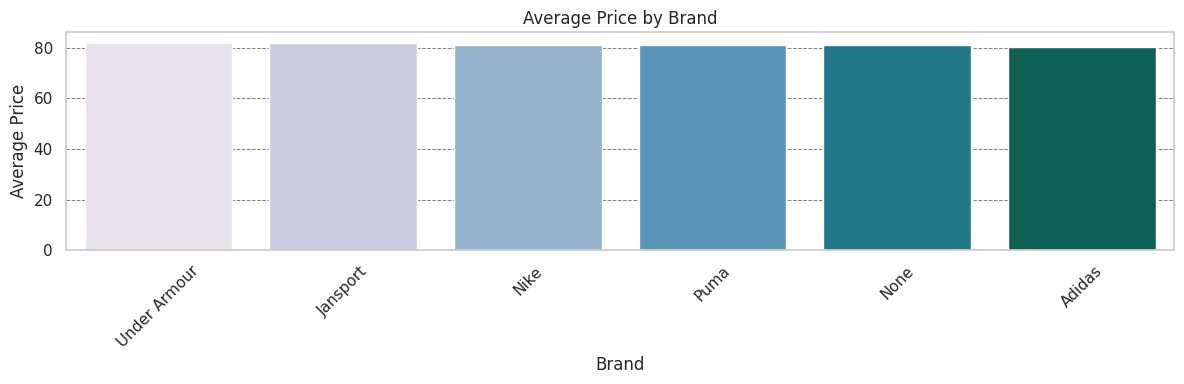


Column: Material
Average Price by Material:
Material
Polyester    82.029424
Canvas       81.831022
None         81.315460
Nylon        81.071794
Leather      80.488749
Name: Price, dtype: float64



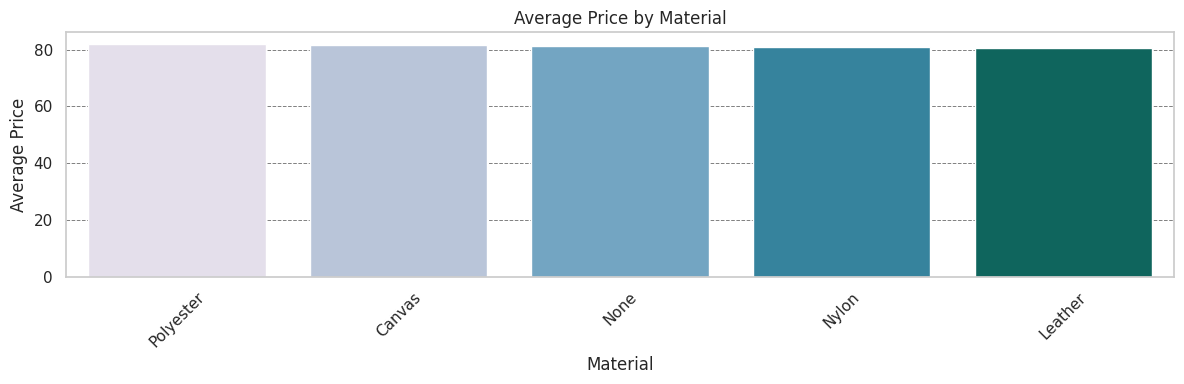


Column: Size
Average Price by Size:
Size
Large     81.611747
Small     81.467620
Medium    81.201377
None      78.623194
Name: Price, dtype: float64



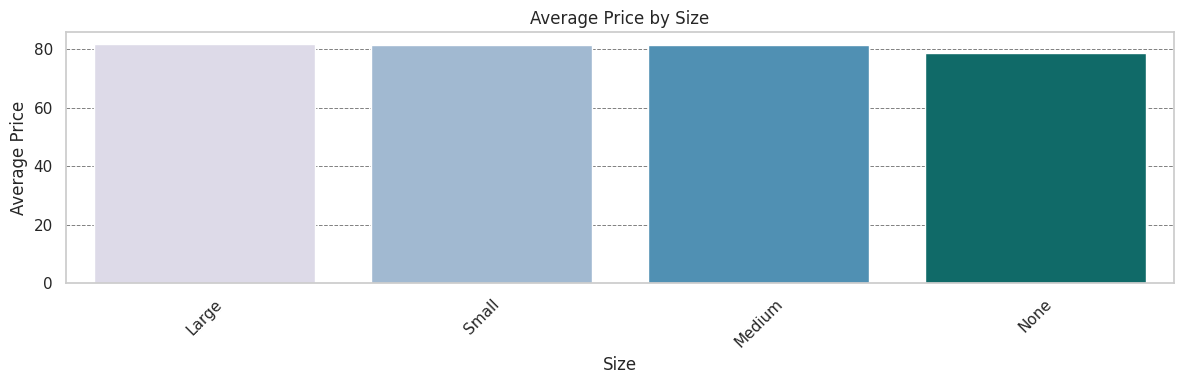


Column: Laptop Compartment
Average Price by Laptop Compartment:
Laptop Compartment
Yes     81.420190
No      81.350487
None    80.428607
Name: Price, dtype: float64



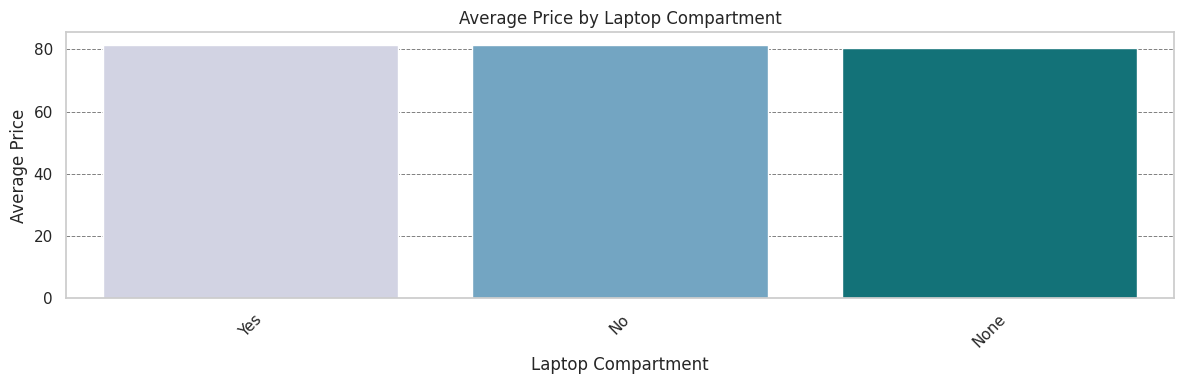


Column: Waterproof
Average Price by Waterproof:
Waterproof
No      81.438525
Yes     81.411426
None    78.771088
Name: Price, dtype: float64



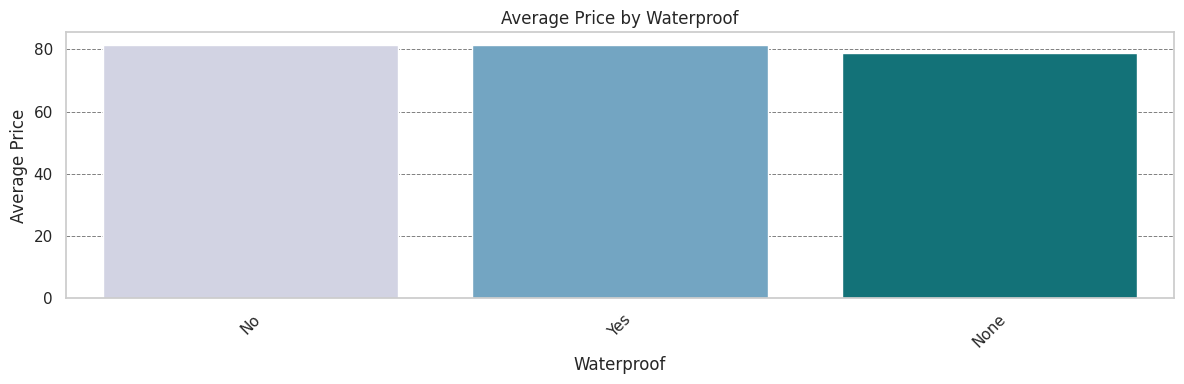


Column: Style
Average Price by Style:
Style
None         81.953537
Tote         81.500007
Backpack     81.357717
Messenger    81.185531
Name: Price, dtype: float64



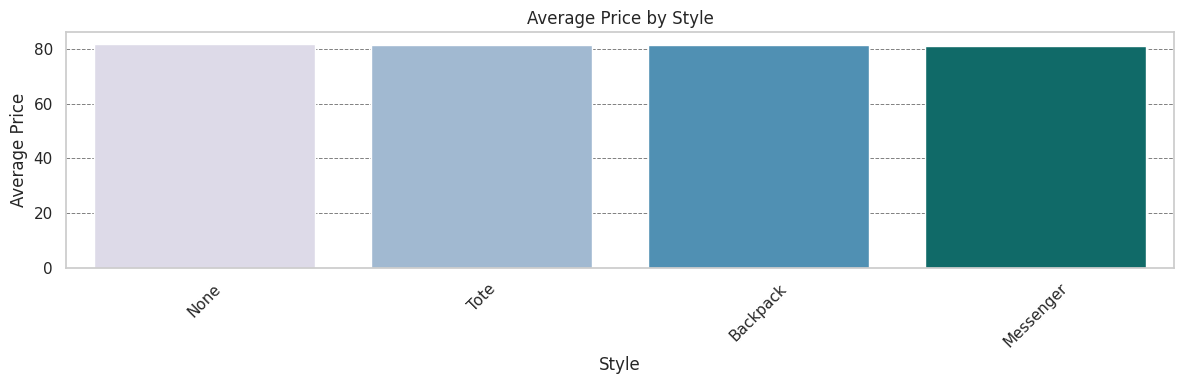


Column: Color
Average Price by Color:
Color
Green    82.252359
Blue     82.013390
None     81.626821
Pink     81.596170
Red      81.010017
Gray     80.917014
Black    80.326088
Name: Price, dtype: float64



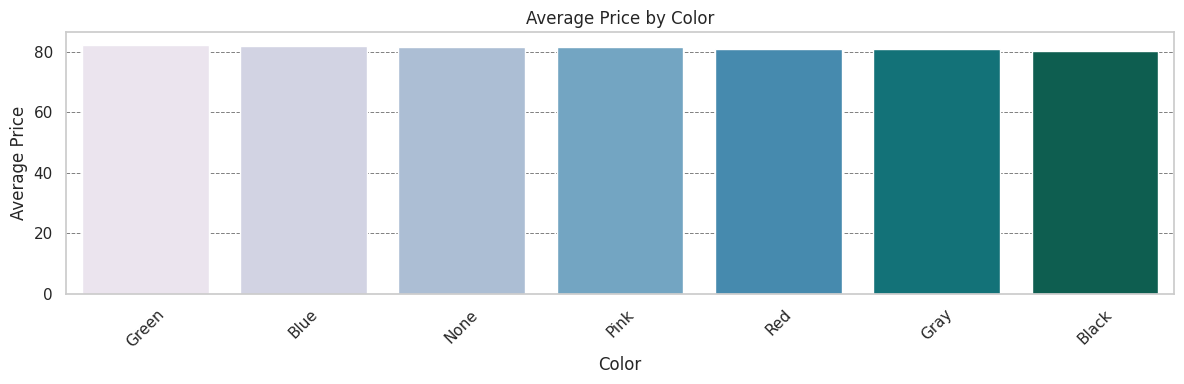

In [38]:
# Analyze each categorical column with respect to the target variable 'Price'
for col in non_numerical_columns:
    print(f"\nColumn: {col}")
    
    # Calculate average price for each unique value in the categorical column
    average_price = merged_train_data.groupby(col)[target_variable].mean().sort_values(ascending=False)
    print(f"Average Price by {col}:\n{average_price}\n")
    
    plt.figure(figsize=(12, 4))
    sns.barplot(x=average_price.index, y=average_price.values, palette='PuBuGn')
    plt.title(f'Average Price by {col}')
    plt.xlabel(col)
    plt.ylabel('Average Price')
    plt.xticks(rotation=45)
    plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.7) 
    plt.tight_layout()
    plt.show()


Column: Brand
Average Weight Capacity by Brand:
Brand
Under Armour    18.051715
Adidas          18.040559
Jansport        18.022570
Nike            18.011536
Puma            17.954665
None            17.814371
Name: Weight Capacity (kg), dtype: float64



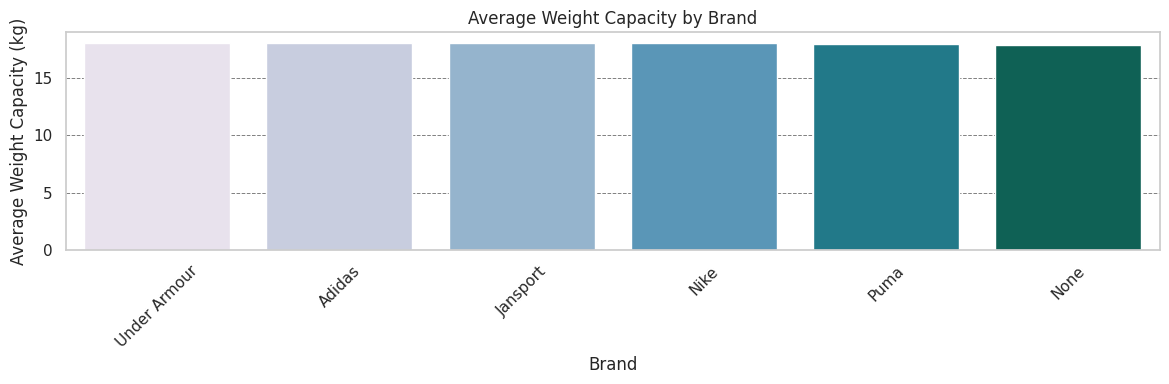


Column: Material
Average Weight Capacity by Material:
Material
Leather      18.062904
Polyester    18.043245
Nylon        18.021543
None         18.008340
Canvas       17.903911
Name: Weight Capacity (kg), dtype: float64



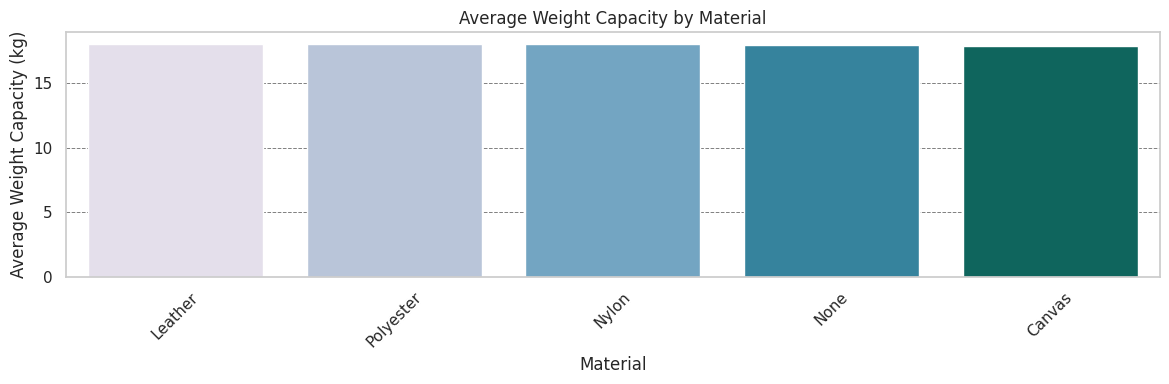


Column: Size
Average Weight Capacity by Size:
Size
None      18.499865
Medium    18.036095
Large     18.003500
Small     17.955091
Name: Weight Capacity (kg), dtype: float64



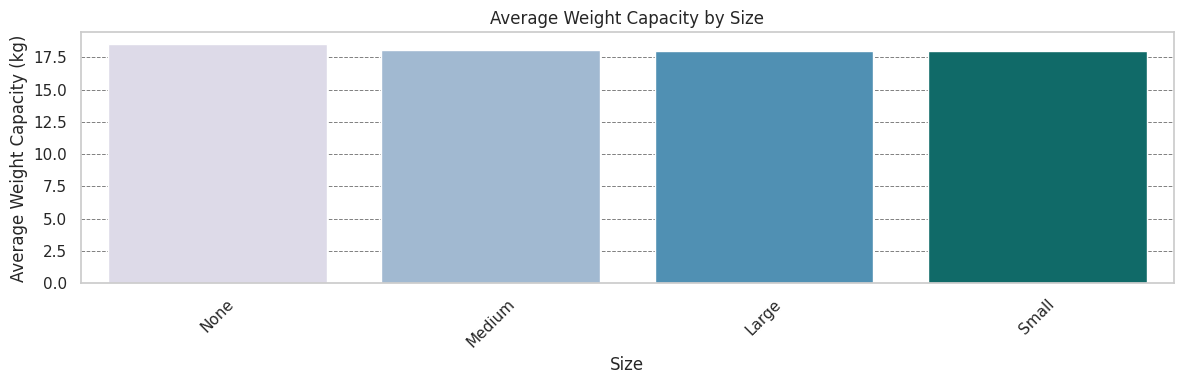


Column: Laptop Compartment
Average Weight Capacity by Laptop Compartment:
Laptop Compartment
None    18.256567
Yes     18.025085
No      17.982794
Name: Weight Capacity (kg), dtype: float64



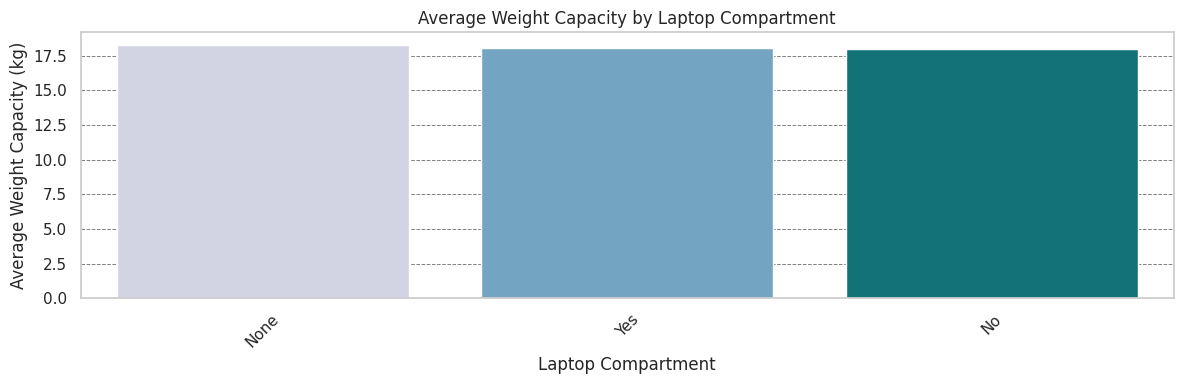


Column: Waterproof
Average Weight Capacity by Waterproof:
Waterproof
None    18.309837
Yes     18.030569
No      17.975277
Name: Weight Capacity (kg), dtype: float64



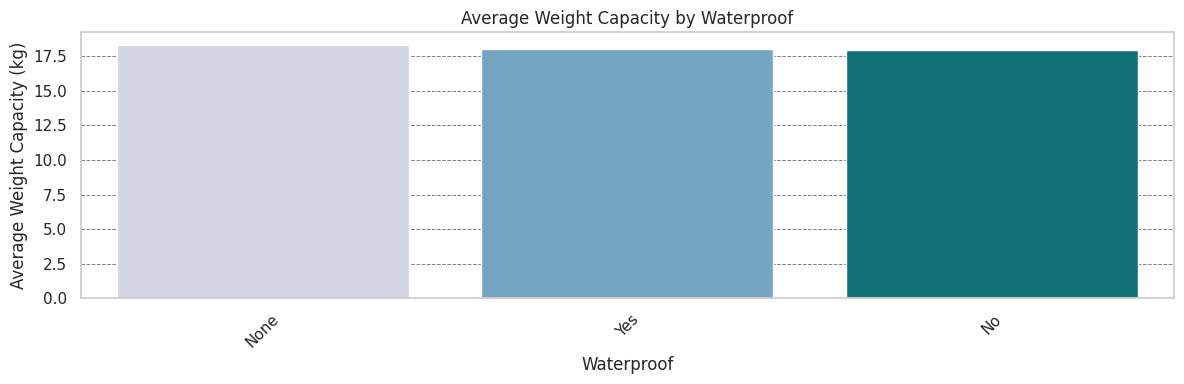


Column: Style
Average Weight Capacity by Style:
Style
None         18.050225
Tote         18.026184
Backpack     18.009258
Messenger    17.993067
Name: Weight Capacity (kg), dtype: float64



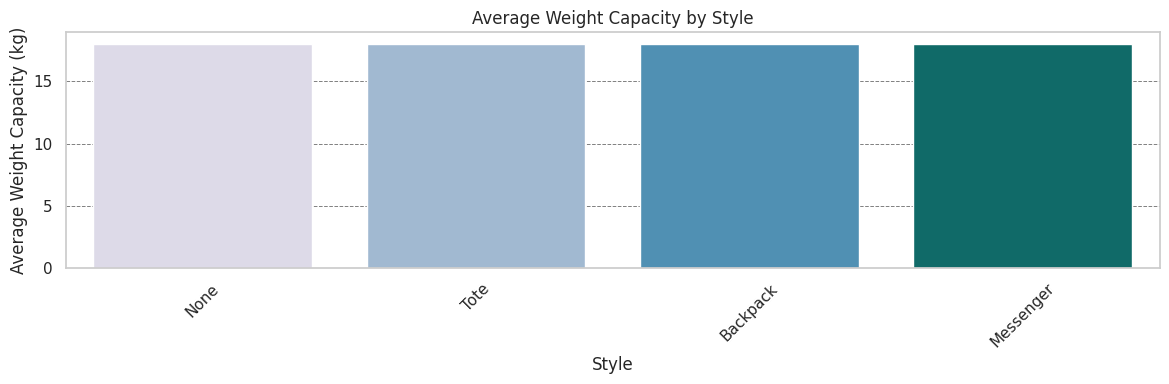


Column: Color
Average Weight Capacity by Color:
Color
Gray     18.033913
Blue     18.026611
Green    18.018854
Black    18.015994
Pink     17.997781
Red      17.996558
None     17.882082
Name: Weight Capacity (kg), dtype: float64



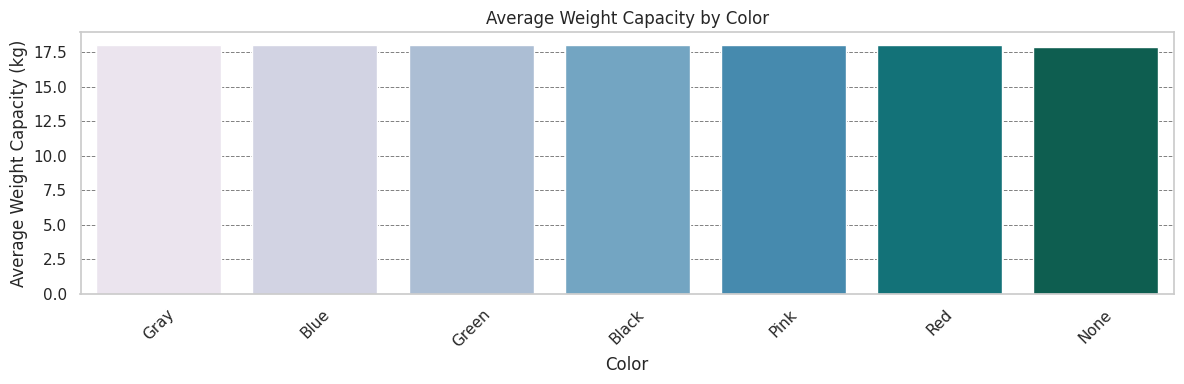


Column: Compartments
Average Weight Capacity by Compartments:
Compartments
7.0     18.174380
9.0     18.065201
6.0     18.035209
5.0     18.034709
8.0     18.019427
2.0     17.991392
4.0     17.962657
3.0     17.961869
1.0     17.946071
10.0    17.922466
Name: Weight Capacity (kg), dtype: float64



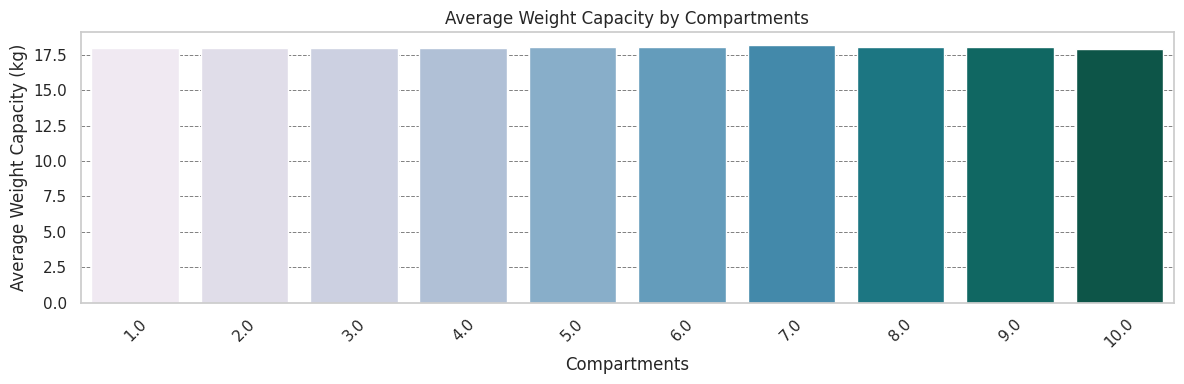

In [39]:
# Define the column of interest
column_of_interest = 'Weight Capacity (kg)'

# List of categorical columns
categorical_columns = ['Brand', 'Material', 'Size', 'Laptop Compartment', 'Waterproof', 'Style', 'Color', 'Compartments']

# Analyze each categorical column
for col in categorical_columns:
    print(f"\nColumn: {col}")
    
    # Calculate average weight capacity for each unique value in the categorical column
    average_weight_capacity = merged_train_data.groupby(col)[column_of_interest].mean().sort_values(ascending=False)
    print(f"Average Weight Capacity by {col}:\n{average_weight_capacity}\n")
    
    plt.figure(figsize=(12, 4))
    sns.barplot(x=average_weight_capacity.index, y=average_weight_capacity.values, palette='PuBuGn')
    plt.title(f'Average Weight Capacity by {col}')
    plt.xlabel(col)
    plt.ylabel('Average Weight Capacity (kg)')
    plt.xticks(rotation=45)
    plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.7) 
    plt.tight_layout()
    plt.show()

## Categorical Feature Encoding with TargetEncoder

In [40]:
# Instantiate TargetEncoder
TE = TargetEncoder(n_folds=25, smooth=20, split_method='random', stat='mean')

features = test_data.columns.tolist()

for col in features:
    TE.fit(merged_train_data[col], merged_train_data[target_variable])  # Fit on training data
    merged_train_data[col] = TE.transform(merged_train_data[col])  # Transform training data
    test_data[col] = TE.transform(test_data[col])  # Transform test data

# Function to display summary
def display_summary(df, name):
    print(f"\n{name} Summary:")
    print("-" * 30)
    print("\nData Info:")
    df.info()
    print("\nFirst Rows:")
    display(df.head().T)

# Display summary of the transformed datasets
display_summary(merged_train_data, "Merged Train Dataset")
display_summary(test_data, "Test Dataset")


Merged Train Dataset Summary:
------------------------------

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3994318 entries, 0 to 3994317
Data columns (total 10 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Brand                 float64
 1   Material              float64
 2   Size                  float64
 3   Compartments          float64
 4   Laptop Compartment    float64
 5   Waterproof            float64
 6   Style                 float64
 7   Color                 float64
 8   Weight Capacity (kg)  float64
 9   Price                 float64
dtypes: float64(10)
memory usage: 304.7 MB

First Rows:


0          1          2          3          4
Brand                  81.772869  81.780718  82.079035  81.290746  80.534376
Material               80.493705  81.829363  80.496205  81.066592  81.828947
Size                   81.199831  81.467312  81.478402  81.466540  81.203896
Compartments           81.618870  81.592441  81.637459  81.720310  81.037067
Laptop Compartment     81.413628  81.421134  81.432393  81.418340  81.430019
Waterproof             81.443211  81.409085  81.445734  81.436281  81.414882
Style                  81.504309  81.185370  81.185122  81.188170  81.197596
Color                  80.323226  82.246231  81.001902  82.262451  82.243816
Weight Capacity (kg)   82.719096  81.362175  81.362175  81.362175  81.362175
Price                 112.158750  68.880560  39.173200  80.607930  86.023120


Test Dataset Summary:
------------------------------

Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, 300000 to 499999
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Brand                 200000 non-null  float64
 1   Material              200000 non-null  float64
 2   Size                  200000 non-null  float64
 3   Compartments          200000 non-null  float64
 4   Laptop Compartment    200000 non-null  float64
 5   Waterproof            200000 non-null  float64
 6   Style                 200000 non-null  float64
 7   Color                 200000 non-null  float64
 8   Weight Capacity (kg)  200000 non-null  float64
dtypes: float64(9)
memory usage: 15.3 MB

First Rows:


id                       300000     300001     300002     300003     300004
Brand                 81.225581  81.284807  80.527704  80.527704  80.991908
Material              80.488767  81.831012  81.831012  81.071800  81.071800
Size                  81.467619  81.201380  81.611743  81.611743  81.611743
Compartments          81.616343  81.601272  80.280580  81.032032  81.616343
Laptop Compartment    81.350487  81.350487  81.350487  81.420190  81.420190
Waterproof            81.438524  81.411425  81.411425  81.438524  81.411425
Style                 81.500005  81.357717  81.185534  81.185534  81.500005
Color                 82.252331  82.252331  82.013370  82.252331  80.326122
Weight Capacity (kg)  82.752365  80.938726  90.901021  78.336685  81.362175

#### **Target Encoding Application**  
- **TargetEncoder** was applied with:  
  - `25 folds` for better generalization.  
  - `Smooth parameter = 20` to avoid overfitting.  
  - `Random split` method to ensure unbiased encoding.  
  - `Mean statistics` to capture feature-target relationships.  

- **Each categorical feature was transformed into numerical values**, making it suitable for machine learning models.  

#### **Dataset Overview**  
**Merged Train Dataset**  
   - Contains **3,994,318 entries** with **10 numerical columns**.  
   - **All features are in `float64` format**.  
   - **Memory usage: ~304.7 MB**, indicating a large dataset size.  

**Test Dataset**  
   - Contains **200,000 entries** with **9 numerical columns**.  
   - **All features are also in `float64` format**, ensuring consistency with the training set.  
   - **Memory usage: ~15.3 MB**, significantly smaller than the training dataset.  

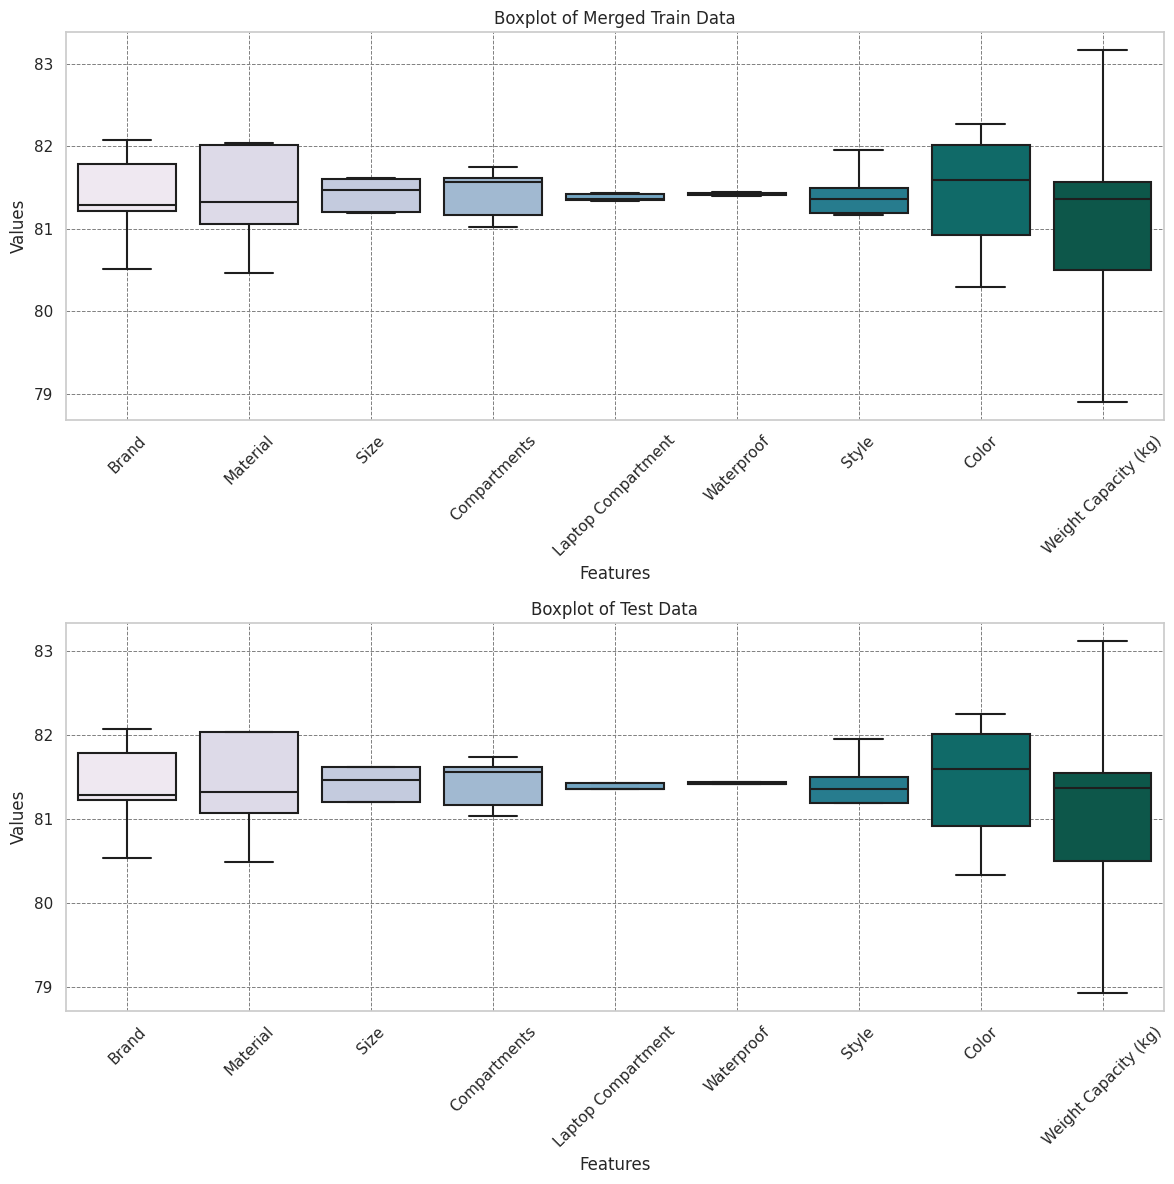

In [41]:
# List of numerical features to plot (excluding 'Price')
numerical_features = merged_train_data.select_dtypes(include=['number']).columns.tolist()
if 'Price' in numerical_features:
    numerical_features.remove('Price')

def plot_individual_boxplot(data, columns, ax, title):
    sns.boxplot(data=data[columns], ax=ax, palette="PuBuGn", showfliers=False)
    ax.set_title(title)
    ax.set_xlabel('Features')
    ax.set_ylabel('Values')
    ax.grid(color='gray', linestyle='--', linewidth=0.7)  
    ax.tick_params(axis='x', rotation=45)  

def plot_boxplot(train, test, columns):
    num_features = len(columns)
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 6 * 2), sharex=False)
    plot_individual_boxplot(train, columns, axes[0], 'Boxplot of Merged Train Data')
    plot_individual_boxplot(test, columns, axes[1], 'Boxplot of Test Data')
    plt.tight_layout()
    plt.show()

plot_boxplot(merged_train_data, test_data, numerical_features)

## Correlation Analysis of Preprocessed Data

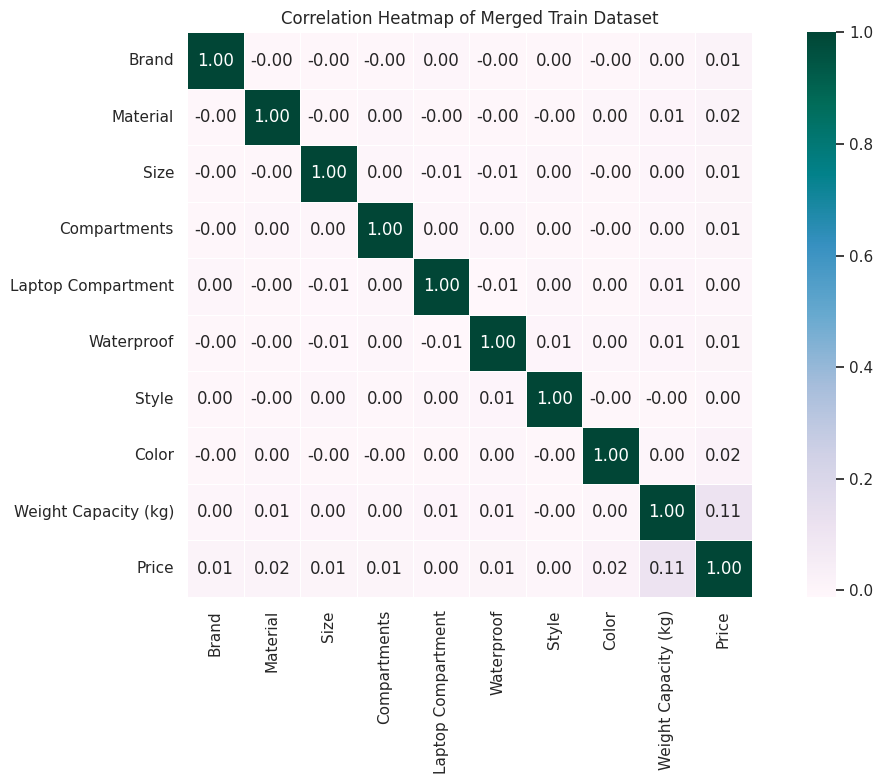

In [42]:
# Calculate the correlation matrix (including 'Price')
correlation_matrix = merged_train_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='PuBuGn', fmt=".2f", linewidths=0.5, square=True)
plt.title('Correlation Heatmap of Merged Train Dataset')
plt.xticks()  
plt.yticks() 
plt.tight_layout() 
plt.show()

### **Correlation Insights on Features & Price**  

#### **General Observations**  
The **Price** column has low to moderate correlation values with other features.  
**Weight Capacity (kg) has the strongest correlation with Price** (`0.1083`), indicating that heavier products tend to be priced higher.  
Most feature correlations are **close to zero**, suggesting weak relationships among variables.  

#### **Key Feature-Price Correlations**  
**Weight Capacity (kg) → Price (`0.1083`)**  
   - **Strongest positive correlation** among all features.  
   - Suggests that products with higher weight capacity tend to be more expensive.  

**Material → Price (`0.0156`)**  
   - Weak positive correlation.  
   - Material type has a minor influence on pricing.  

**Brand → Price (`0.0134`)**  
   - Somewhat weak, but suggests different brands may have slightly different price levels.  

**Compartments, Laptop Compartment, Waterproof, and Style**  
   - **Very weak correlations (`~0.01` or lower)** with Price.  
   - These attributes alone may not strongly impact product pricing.  

#### **Feature Relationships & Insights**  
**No strong multicollinearity among features** (all correlations are close to zero).  
**Laptop Compartment vs. Waterproof (`-0.0113`)**  
   - Weak negative correlation suggests waterproofing and laptop compartments may not always be included together.  
**Size vs. Compartments (`0.0035`)**  
   - Very weak relationship, meaning the size of a product doesn’t determine the number of compartments.  


In [43]:
# Create a correlation table for the target variable with other features
target_correlation_table = merged_train_data.corr()[[target_variable]].sort_values(by=target_variable, ascending=False)

# Displaying the table
print("Correlation of 'Price' with Other Features:")
display(target_correlation_table)

Correlation of 'Price' with Other Features:


Price
Price                 1.000000
Weight Capacity (kg)  0.108337
Color                 0.016557
Material              0.015646
Brand                 0.013482
Size                  0.011328
Compartments          0.010447
Waterproof            0.010291
Style                 0.003814
Laptop Compartment    0.003686

#### **Insights on 'Price' Correlation with Other Features**  

**Overall, 'Price' shows weak correlations with all features** (values close to zero).  
**'Weight Capacity (kg)' has the strongest correlation (`0.1083`)**, suggesting that heavier products tend to be more expensive.  
**Other features have minimal impact on price**, meaning pricing is likely influenced by external factors.  

#### **Breakdown of Correlations**  
**Weight Capacity (kg) → Price (`0.1083`)**  
   - The **strongest** correlation, though still weak.  
   - Suggests that products with higher weight capacity tend to be priced higher, possibly due to material costs or durability factors.  

**Color → Price (`0.0166`)**  
   - Negligible correlation.  
   - Color alone does not significantly impact pricing.  

**Material → Price (`0.0156`)**  
   - Slight positive correlation.  
   - Some materials may be priced higher, but the effect is minimal.  

**Brand → Price (`0.0135`)**  
   - Very weak relationship.  
   - Different brands may have slightly different price points, but branding alone does not dictate price.  

**Size → Price (`0.0113`)**  
   - Almost no correlation, meaning bigger products are not necessarily more expensive.  

**Compartments, Waterproof, Style, Laptop Compartment (`< 0.01`)**  
   - These features have **little to no impact on price**, indicating that the number of compartments, waterproofing, or laptop storage are not key pricing factors.  


## Define the target variable and features

In [44]:
# Define the target variable and features
target_variable = 'Price'
features = merged_train_data.select_dtypes(include=['number']).columns.tolist()
features.remove(target_variable)  # Exclude target variable from features

## Split the data into training and validation sets

In [45]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    merged_train_data[features], 
    merged_train_data[target_variable], 
    test_size=0.2, 
    random_state=42
)

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Model Training</span>

<div style="border-radius: 15px; border: 2px solid #8B9467; padding: 10px; background: linear-gradient(135deg, #A1C9F2, #4CB391); text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);">
    <h1 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); font-weight: bold; margin-bottom: 5px; font-size: 28px; font-family: 'Roboto', sans-serif;">
        Model Training
    </h1>
</div>

## Instantiate LightGBM model


In [46]:
model = lgb.LGBMRegressor(
    boosting_type='gbdt',
    random_state=42,
    num_leaves=31, 
    learning_rate=0.1, 
    n_estimators=1000, 
    objective='regression',
    device='gpu',
    verbose=-1
)

## Train model with evaluation results

In [47]:
# Define dictionary to store evaluation results
evals_result = {}

model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric='rmse',
    callbacks=[
        lgb.record_evaluation(evals_result),
        lgb.early_stopping(100),
        lgb.log_evaluation(100)
    ]
)

Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 38.6541	valid_0's l2: 1494.14
Early stopping, best iteration is:
[99]	valid_0's rmse: 38.6541	valid_0's l2: 1494.14


LGBMRegressor(device='gpu', n_estimators=1000, objective='regression',
              random_state=42, verbose=-1)

In [48]:
# Extract validation RMSE values
val_rmse = evals_result['valid_0']['rmse']
min_rmse = min(val_rmse)
min_index = val_rmse.index(min_rmse)

# Displaying Minimum Validation RMSE
print(f"Validation RMSE(min): {min_rmse:.4f}")

Validation RMSE(min): 38.6541


## Feature Importance Analysis

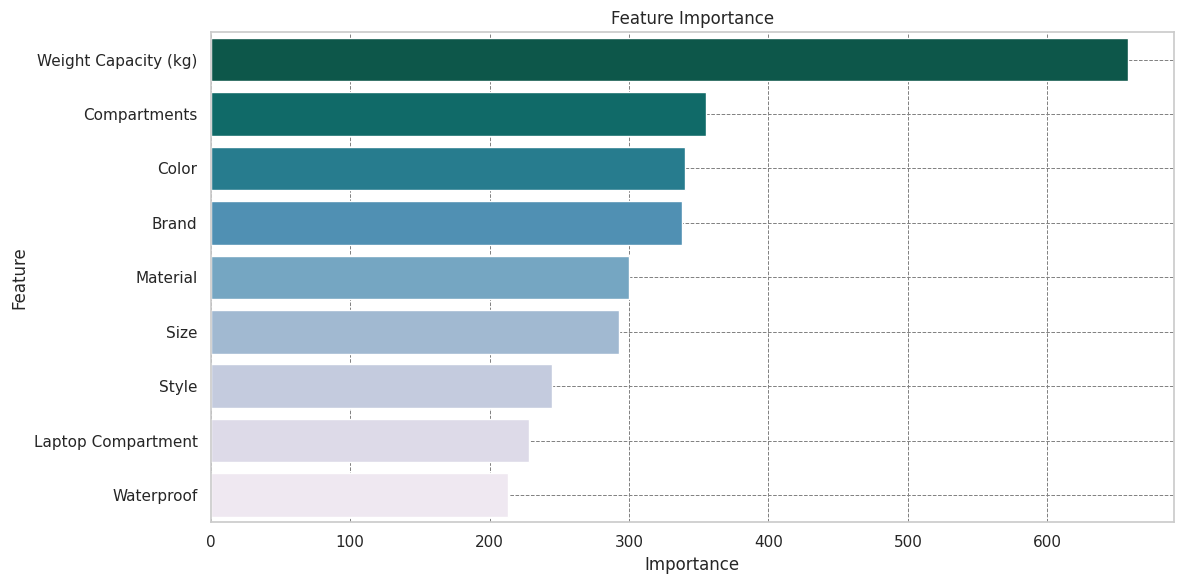

In [49]:
importance_df = pd.DataFrame({'Feature': features, 'Importance': model.feature_importances_})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette="PuBuGn_r")
plt.title('Feature Importance')
plt.grid(color='gray', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

#### **Insights from Feature Importance Analysis**  

**📦 Weight Capacity (kg) is the Most Influential Factor**  
   - Heavier weight capacity backpacks tend to have higher prices, possibly due to sturdier materials and better construction.  

**🎒 Number of Compartments Matters**  
   - More compartments can increase the price, as they enhance organization and usability.  

**🎨 Color Impact**  
   - Color plays a notable role, likely due to popular or premium color choices driving higher demand.  

**🏷️ Brand Influence**  
   - Well-known brands often command higher prices due to reputation, quality, and brand perception.  

**🛠️ Material Matters**  
   - High-quality materials (e.g., 'Leather', 'Canvas', 'Nylon') contribute to pricing differences.  

**📏 Size Consideration**  
   - Larger backpacks may have higher prices due to more material usage and increased functionality.  

**👗 Style Impact**  
   - Stylish designs or trending aesthetics might contribute to pricing variations.  

**💻 Laptop Compartment Presence**  
   - Backpacks with dedicated laptop compartments often cost more due to added padding and protection.  

**💧 Waterproof Feature**  
   - Waterproof backpacks are valued higher, as they provide protection against environmental conditions.  

***Weight capacity, compartments, and color are the top three factors influencing backpack prices. Functional aspects like brand, material, and waterproofing also contribute to pricing, indicating that both **practicality and aesthetics** play crucial roles in determining value.***

## Analyzing Actual vs Predicted and Residual & Residual

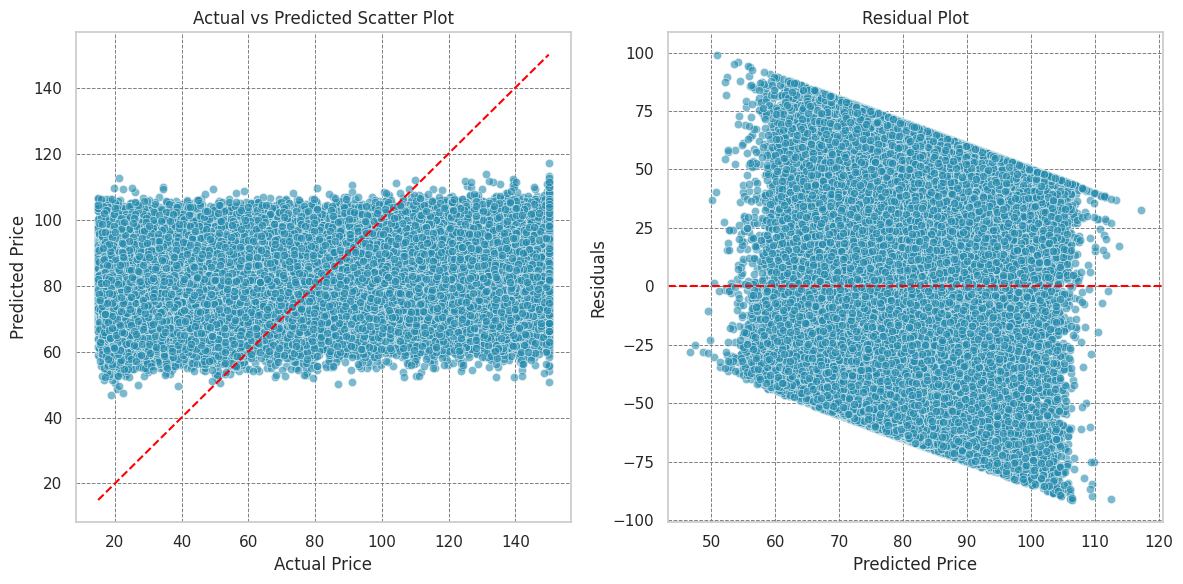

In [50]:
# Create subplots for Actual vs Predicted and Residual Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
palette = sns.color_palette("PuBuGn", 2)

# Actual vs Predicted Scatter Plot
sns.scatterplot(x=y_val, y=model.predict(X_val), alpha=0.6, color=palette[1], ax=axes[0])
axes[0].plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], '--', color="red")  
axes[0].set_xlabel("Actual Price")
axes[0].set_ylabel("Predicted Price")
axes[0].set_title("Actual vs Predicted Scatter Plot")
axes[0].grid(color='gray', linestyle='--', linewidth=0.7)

# Residual Plot
residuals = y_val - model.predict(X_val)
sns.scatterplot(x=model.predict(X_val), y=residuals, alpha=0.6, color=palette[1], ax=axes[1])
axes[1].axhline(y=0, color="red", linestyle="--")  
axes[1].set_xlabel("Predicted Price")
axes[1].set_ylabel("Residuals")
axes[1].set_title("Residual Plot")
axes[1].grid(color='gray', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

## Analyzing Prediction Distributions

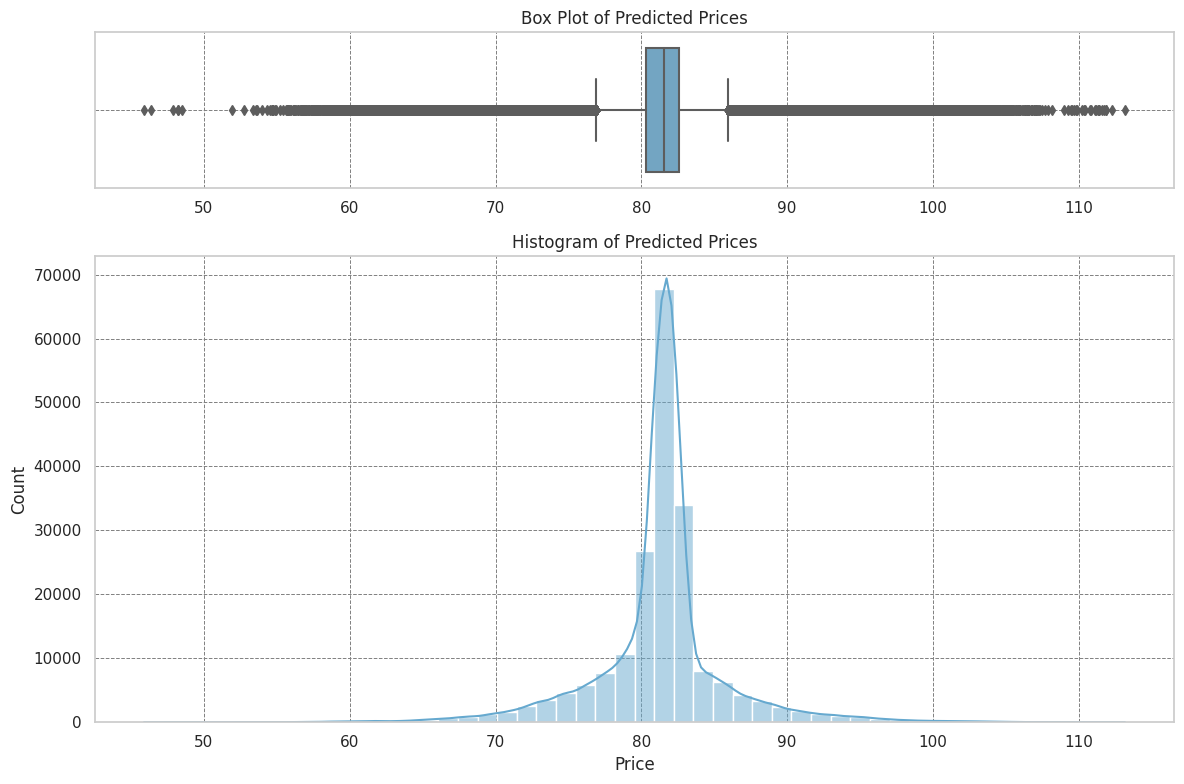

In [51]:
# Predict on Test Data
y_test_pred = model.predict(test_data[features])

# Box Plot and Histogram as Subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={'height_ratios': [1, 3]})

sns.boxplot(x=y_test_pred, ax=axes[0], color=sns.color_palette("PuBuGn", 1)[0])
axes[0].set_title("Box Plot of Predicted Prices")

sns.histplot(y_test_pred, bins=50, kde=True, ax=axes[1], color=sns.color_palette("PuBuGn", 1)[0])
axes[1].set_title("Histogram of Predicted Prices")
axes[1].set_xlabel("Price")

axes[0].grid(color='gray', linestyle='--', linewidth=0.7)
axes[1].grid(color='gray', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()


<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Creating the Submission File</span>

<div style="border-radius: 15px; border: 2px solid #8B9467; padding: 10px; background: linear-gradient(135deg, #A1C9F2, #4CB391); text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);">
    <h1 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); font-weight: bold; margin-bottom: 5px; font-size: 28px; font-family: 'Roboto', sans-serif;">
        Creating the Submission File
    </h1>
</div>


In [52]:
# Save Predictions to CSV
submission = pd.DataFrame({'id': test_data.index, 'Price': y_test_pred})
submission.to_csv('submission.csv', index=False)
print("Submission file created successfully!")

# Display first 10 predictions
display(submission.head(10))

Submission file created successfully!


id      Price
0  300000  82.801566
1  300001  82.645203
2  300002  89.350914
3  300003  77.978261
4  300004  80.724593
5  300005  81.250692
6  300006  92.688076
7  300007  77.787458
8  300008  77.003207
9  300009  81.494967

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

<div style="border-radius: 15px; border: 2px solid #8B9467; padding: 10px; background: linear-gradient(135deg, #A1C9F2, #4CB391); text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);">
    <h1 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); font-weight: bold; margin-bottom: 10px; font-size: 28px; font-family: 'Roboto', sans-serif;">
        🙏 Thanks for Reading! 🚀
    </h1>
    <p style="color: #ffffff; font-size: 22px; text-align: center;">
        Happy Coding! 🙌😊
    </p>
</div>
